# Multilineal regression model to clustered data
## Table of contents
1. [Data Wrangling](#Data%20Wrangling)
    1. [Dealing with target feature 'Amount Paid' (income €) (cleaning it)](#Amount%20Paid)
    2. [Dealing with date](#Dealingwithdate)
2. [Outliers](#Outliers)
3. [Tukey fence method](#OutliersV)
    1. [Strategic deal with outliers](#OutliersVI)
4. [Statistical analysis of data: EDA](#Sta)
5. [Skewness](#StaIV)
    1. [Kolmogorov-Smirnov test for goodness of fit](#nks)
6. [Feature of Number of Spaces (Poisson Distribution)](#Stap)   
7. [Analyses statistics cumulate](#Ana)
8. [Multicollinearity](#mu)
9. [Clustering](#cl)
10. [Statistical analysis of the Clusters](#cls)
11. [Multicollinearity with the feature "Cluster"](#mcl)
12. [Strategic to modeling the data](#str)
13. [Regression models](#rg)
     1. [Polynomial Regression](#pr)
14. [Test Normality: Kolmogorov-Smirnov test for goodness of fit](#ks)
    1. [Test Normality: Jarque-Bera test](#jb)
15. [Extend to ElasticNet: applying regularization](#enet)
16. [Use ensemble method to improve performance and accuracy: Random Forest vs XGBoost](#esn)
17. [Tune ensemble method: GridSearchCV (XGBoost)](#gs)
18. [Final model: eXtend Gradient Boosting (XGBoost)](#xgb)



In [1]:

# importing necessary libraries
import pandas as pd
import numpy as np

# Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta
from scipy import stats


sns.set_style('darkgrid')

import markdown

%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings


# from Scipy statistics distribution
from scipy.stats import poisson
from scipy.stats import norm
import statistics

In [2]:
# Clustering
from kmodes.kmodes import KModes

# train test
from sklearn.model_selection import train_test_split


# stratified k-fold cross validation evaluation regression models
from numpy import loadtxt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


#Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#import libraries for regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error



# statsmodels is a Python modules statistical models

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


# pip install statsmodels

In [3]:
# read data from the website Dublin Council

import requests

url = "https://data.smartdublin.ie/dataset/5d838676-8cc3-4529-bbeb-35021e416b21/resource/b3d97186-f6ff-4160-aa63-8762cc4d11ad/download/dccparkingbaysuspensionsp20110930-1044.csv"
r = requests.get(url)
open('temporary.csv', 'wb').write(r.content)

df = pd.read_csv('temporary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  2092 non-null   int64 
 1   Date                2091 non-null   object
 2   Location of Spaces  2091 non-null   object
 3   No of Spaces        2087 non-null   object
 4   Purpose             2090 non-null   object
 5   Date Suspended      2088 non-null   object
 6   Date Expired        2085 non-null   object
 7   Amount Paid         2092 non-null   object
dtypes: int64(1), object(7)
memory usage: 130.9+ KB


In [4]:

df.head(10)

,Id,Date,Location of Spaces,No of Spaces,Purpose,Date Suspended,Date Expired,Amount Paid
0,1274,20-Jan-06,Commons Street (IFSC),5,Parking Catering Vehicles,23-Jan-06,23-Jan-06,152.00
1,1275,18-Jan-06,St Stephens Green,3,Collection from KPMG,22-Jun-06,22-Jun-06,114.00
2,1276,05-Jan-06,Stephens Green,4,To facilate filiming,09-Jan-06,09-Jan-06,152.00
3,1277,05-Jan-06,Stephens Green (Loreto College),4,Road Caster,09-Jan-06,09-Jan-06,152.00
4,1278,05-Jan-06,Molesworth Street,12,To facilate Filiming,09-Jan-06,09-Jan-06,152.00
5,1279,05-Jan-06,Whitefriars,2,Furniture removal,23-Jan-06,23-Jan-06,60.80
6,1280,05-Jan-06,Townsend Street,2,To allow access to loading Bay,09-Jan-05,13-Jan-06,456.00
7,1281,06-Jan-06,Mount St Crescent (Sp. Surrounding Peppercanis...,6,To facilate filiming,10-Jan-06,11-Jan-06,200.00
8,1282,06-Jan-06,Military Road 9 Off Rathmines Road).,6,For Site Compound,09-Jan-06,09-Sep-06,0.00
9,1283,06-Jan-06,Lennox Street (Off South Richmond Street),6,For Site Company,09-Jan-06,09-Sep-06,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  2092 non-null   int64 
 1   Date                2091 non-null   object
 2   Location of Spaces  2091 non-null   object
 3   No of Spaces        2087 non-null   object
 4   Purpose             2090 non-null   object
 5   Date Suspended      2088 non-null   object
 6   Date Expired        2085 non-null   object
 7   Amount Paid         2092 non-null   object
dtypes: int64(1), object(7)
memory usage: 130.9+ KB



# Data Wrangling <a name="Data%20Wrangling"></a>


In [6]:

# review data NaN
df.isnull().sum()

Id                    0
Date                  1
Location of Spaces    1
No of Spaces          5
Purpose               2
Date Suspended        4
Date Expired          7
Amount Paid           0
dtype: int64

## Dealing with target feature 'Amount Paid' (income €) (cleaning it)<a name="Amount%20Paid"></a>

Format the features 

Replace NaN values for the median because it is not affected for the outliers values

In [7]:
# convert to number (float)
df['Amount Paid'] = df['Amount Paid'].apply(str)
#convert revenue column to float
df['Amount Paid'] = df['Amount Paid'].apply(lambda x: float(x.split()[0].replace(',', '')))
df.head()

,Id,Date,Location of Spaces,No of Spaces,Purpose,Date Suspended,Date Expired,Amount Paid
0,1274,20-Jan-06,Commons Street (IFSC),5,Parking Catering Vehicles,23-Jan-06,23-Jan-06,152.0
1,1275,18-Jan-06,St Stephens Green,3,Collection from KPMG,22-Jun-06,22-Jun-06,114.0
2,1276,05-Jan-06,Stephens Green,4,To facilate filiming,09-Jan-06,09-Jan-06,152.0
3,1277,05-Jan-06,Stephens Green (Loreto College),4,Road Caster,09-Jan-06,09-Jan-06,152.0
4,1278,05-Jan-06,Molesworth Street,12,To facilate Filiming,09-Jan-06,09-Jan-06,152.0


In [8]:
# clean negative values
index = df[df['Amount Paid'] < 0].index
print('\n Median:  ', df['Amount Paid'].median())
df.iloc[index]


 Median:   152.0


,Id,Date,Location of Spaces,No of Spaces,Purpose,Date Suspended,Date Expired,Amount Paid
1472,3657,27-Jan-09,"Drumcondra Road, outside Hessions",4,FM104 Roadhog,17-Feb-09,17-Feb-09,-76.0


In [9]:
# Cleanning target feature 'Amount Paid' from negative values
df.replace(to_replace=df.loc[index,'Amount Paid'].values,
           value=df['Amount Paid'].median(),
          inplace=True)


In [10]:
df.loc[index,'Amount Paid']

1472    152.0
Name: Amount Paid, dtype: float64


## Dealing with date<a name="Dealingwithdate"></a>

Identify anomalies in the date

In [11]:
from datetime import date
# review date format
df[['Date','Date Suspended','Date Expired']]

,Date,Date Suspended,Date Expired
0,20-Jan-06,23-Jan-06,23-Jan-06
1,18-Jan-06,22-Jun-06,22-Jun-06
2,05-Jan-06,09-Jan-06,09-Jan-06
3,05-Jan-06,09-Jan-06,09-Jan-06
4,05-Jan-06,09-Jan-06,09-Jan-06
...,...,...,...
2087,14-Jun-11,25-Feb-12,25-Feb-12
2088,14-Jun-11,10-Mar-12,10-Mar-12
2089,14-Jun-11,10-Mar-12,10-Mar-12
2090,14-Jun-11,26-Jul-11,26-Jul-11


In [12]:

# review data without date 
df[['Date','Date Suspended','Date Expired']].isnull().sum()


Date              1
Date Suspended    4
Date Expired      7
dtype: int64

In [13]:
# identify the row of data without content

df[df[['Date','Date Suspended','Date Expired']].isna().any(axis=1)]

,Id,Date,Location of Spaces,No of Spaces,Purpose,Date Suspended,Date Expired,Amount Paid
196,1471,17-May-06,55 Bath Avenue,1,Permanent removal of parking space,NaN,NaN,1400.0
250,1525,07-Jun-26,12 Argyle Road,1,Permanent removal of parking space,NaN,NaN,1400.0
404,1679,31-Aug-06,3 Derrynane Gardens,1,Permanent removal of parking space,NaN,NaN,2100.0
460,1735,26-Sep-06,Outside 29 Vernon Ave,1,Permanent Removal of Parking Space,26-Oct-06,NaN,2100.0
1664,3849,10-Nov-09,St. Stephens Green,4,Charity fundraising campaign - Holly Days,10-Dec-09,NaN,0.0
1685,3870,01-Dec-09,Anglesea Road,4,Roadhog,19-Dec-09,NaN,164.0
1796,3981,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
# Drop row without any content of Date
index = df[df[['Date','Date Suspended','Date Expired']].isna().all(axis=1)].index
df.iloc[index]
df = df.drop(labels=index, axis=0)


## Dealing with Date Suspended and Date Expired  (Cleaning)<a name="DealingIII"></a>


Update NaN values with last date expired

Format the data in date format


In [15]:
df[df['Date Suspended'].isna()]

,Id,Date,Location of Spaces,No of Spaces,Purpose,Date Suspended,Date Expired,Amount Paid
196,1471,17-May-06,55 Bath Avenue,1,Permanent removal of parking space,NaN,NaN,1400.0
250,1525,07-Jun-26,12 Argyle Road,1,Permanent removal of parking space,NaN,NaN,1400.0
404,1679,31-Aug-06,3 Derrynane Gardens,1,Permanent removal of parking space,NaN,NaN,2100.0


In [16]:
print(df['Date'].max())
df[~df['Date Expired'].isna()].max(), df[~df['Date Suspended'].isna()].max()# oldest date

31-Oct-06


(Id                                                                 4277
 Date                                                          31-Oct-06
 Location of Spaces    outside John Schutte Associates & Teatime Express
 Date Suspended                                                31-Oct-09
 Date Expired                                                  31-Oct-09
 Amount Paid                                                     17201.0
 dtype: object,
 Id                                                                 4277
 Date                                                          31-Oct-06
 Location of Spaces    outside John Schutte Associates & Teatime Express
 Date Suspended                                                31-Oct-09
 Amount Paid                                                     17201.0
 dtype: object)

In [17]:
df['Date Suspended'].fillna(df['Date'], inplace=True) # replace NaN with date

In [18]:

df['Date Expired'].fillna(df['Date Suspended'], inplace=True) # replace NaN with date

In [19]:
max(df['Date Expired'])

'31-Oct-09'

In [20]:
# review data without date 
df[['Date','Date Suspended','Date Expired']].isnull().sum()

Date              0
Date Suspended    0
Date Expired      0
dtype: int64

In [21]:
# convert to datetimes
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Date Suspended'] = pd.to_datetime(df['Date Suspended'], infer_datetime_format=True)
df['Date Expired'] = pd.to_datetime(df['Date Expired'], infer_datetime_format=True)

In [22]:
df[['Date','Date Suspended','Date Expired']]

,Date,Date Suspended,Date Expired
0,2006-01-20,2006-01-23,2006-01-23
1,2006-01-18,2006-06-22,2006-06-22
2,2006-01-05,2006-01-09,2006-01-09
3,2006-01-05,2006-01-09,2006-01-09
4,2006-01-05,2006-01-09,2006-01-09
...,...,...,...
2087,2011-06-14,2012-02-25,2012-02-25
2088,2011-06-14,2012-03-10,2012-03-10
2089,2011-06-14,2012-03-10,2012-03-10
2090,2011-06-14,2011-07-26,2011-07-26



## Create variables for day, month, year (split the column date)<a name="DealingIV"></a>

### Convert to datetimes

In [23]:
# create variables for day, month, year (split the column date)
# convert to datetimes
df['year'] = df['Date'].apply(lambda date: date.year)
df['month'] = df['Date'].apply(lambda date: date.month)
df['day'] = df['Date'].apply(lambda date: date.day)
df = df.drop(['Date'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2091
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  2091 non-null   int64         
 1   Location of Spaces  2091 non-null   object        
 2   No of Spaces        2087 non-null   object        
 3   Purpose             2090 non-null   object        
 4   Date Suspended      2091 non-null   datetime64[ns]
 5   Date Expired        2091 non-null   datetime64[ns]
 6   Amount Paid         2091 non-null   float64       
 7   year                2091 non-null   int64         
 8   month               2091 non-null   int64         
 9   day                 2091 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 179.7+ KB


In [24]:
df[['Date Suspended','Date Expired']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2091
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Suspended  2091 non-null   datetime64[ns]
 1   Date Expired    2091 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 49.0 KB


In [25]:
df['year'].unique(),df['month'].unique(),df['day'].unique()

(array([2006, 2026, 2007, 2009, 2008, 2010, 2011]),
 array([ 1,  2,  3,  4,  5,  6,  8,  7,  9, 10, 11, 12]),
 array([20, 18,  5,  6, 10, 12, 13, 17, 23, 24, 25, 26, 27, 31,  1,  8,  9,
        16, 21, 22, 28,  2,  3,  7, 14, 15, 29,  4, 19, 30, 11]))

In [26]:

df[['Date Suspended','Date Expired']].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Date Suspended,2006-01-23,2006-06-22,2006-01-09,2006-01-09,2006-01-09,2006-01-23,2005-01-09,2006-01-10,2006-01-09,2006-01-09,2006-01-13,2006-01-25,2006-02-04,2006-01-25,2006-01-19,2006-01-18,2006-01-16,2006-01-25,2006-01-09,2006-01-16
Date Expired,2006-01-23,2006-06-22,2006-01-09,2006-01-09,2006-01-09,2006-01-23,2006-01-13,2006-01-11,2006-09-09,2006-09-09,2006-01-13,2006-01-25,2006-02-04,2006-01-25,2006-01-20,2006-03-03,2006-01-20,2006-01-25,2006-01-13,2006-01-20


## Add features with Number of days suspended<a name="DealingV"></a>

Create variables for day, month, year (split the column date)
## No of days suspended

New columns No days suspended contain the info required from Date Suspended and Date Expired 
therefore those dates are redundancy.


## Cleaning when Date Expire < Date Suspended

In [27]:

def diffence_dates(earlydate, latedate):
    return latedate-earlydate + timedelta(days=1)

numbersDays = diffence_dates(df['Date Suspended'],df['Date Expired'])
numbersDays = pd.DataFrame(numbersDays, columns=['NoD'])
#numbersDays['NoD'].dt.days
#print(numbersDays[numbersDays['NoD'].dt.days < 0])
index = numbersDays[numbersDays['NoD'].dt.days < 0].index

df.loc[index,['Date Suspended','Date Expired']]

,Date Suspended,Date Expired
241,2009-06-06,2006-06-09
445,2006-10-03,2006-09-03
695,2007-04-12,2003-04-13
741,2007-07-05,2007-05-07
1762,2010-05-01,2010-04-02
1764,2010-04-29,2010-04-19


In [28]:
# Cleanning Date Expired < Date Suspended
df.replace(to_replace=df.loc[index,'Date Expired'].values,
           value=df.loc[index,'Date Suspended'],
          inplace=True)
df.loc[index,['Date Suspended','Date Expired']]

,Date Suspended,Date Expired
241,2009-06-06,2009-06-06
445,2006-10-03,2006-10-03
695,2007-04-12,2007-04-12
741,2007-07-05,2007-07-05
1762,2010-05-01,2010-05-01
1764,2010-04-29,2010-04-29


## Calculate numbers of days suspended
  

In [29]:
df[['Date Suspended','Date Expired']].T

,0,1,2,3,4,5,6,7,8,9,...,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091
Date Suspended,2006-01-23,2006-06-22,2006-01-09,2006-01-09,2006-01-09,2006-01-23,2005-01-09,2006-01-10,2006-01-09,2006-01-09,...,2011-06-14,2011-06-19,2012-02-05,2012-02-05,2012-02-25,2012-02-25,2012-03-10,2012-03-10,2011-07-26,2011-06-28
Date Expired,2006-01-23,2006-06-22,2006-01-09,2006-01-09,2006-01-09,2006-01-23,2006-01-13,2006-01-11,2006-09-09,2006-09-09,...,2011-06-14,2011-06-19,2012-02-05,2012-02-05,2012-02-25,2012-02-25,2012-03-10,2012-03-10,2011-07-26,2011-07-01


In [30]:
df['No days suspended'] = diffence_dates(df['Date Suspended'],df['Date Expired'])

In [31]:
# convert in days

df['No days suspended'] = df['No days suspended'].dt.days


In [32]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Id,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293
Location of Spaces,Commons Street (IFSC),St Stephens Green,Stephens Green,Stephens Green (Loreto College),Molesworth Street,Whitefriars,Townsend Street,Mount St Crescent (Sp. Surrounding Peppercanis...,Military Road 9 Off Rathmines Road).,Lennox Street (Off South Richmond Street),Ely Place,Stephens Green,Lansdowne Road,York Street,Vicar Street,160 Shelbourne Road,Gloucester Street,York Street,Gloucester Street,Townsend Street
No of Spaces,5,3,4,4,12,2,2,6,6,6,4,4,4,5,8,5,4,4,4,2
Purpose,Parking Catering Vehicles,Collection from KPMG,To facilate filiming,Road Caster,To facilate Filiming,Furniture removal,To allow access to loading Bay,To facilate filiming,For Site Compound,For Site Company,For Loading Purposes,Outside Broadcast Unit,Outside Broadcast Unit,Official Launch,Television Recording,Access to Site,To allow free flow of traffic,Official Launch,To allow access to Loading Bay,To allow access to Loading Bay
Date Suspended,2006-01-23 00:00:00,2006-06-22 00:00:00,2006-01-09 00:00:00,2006-01-09 00:00:00,2006-01-09 00:00:00,2006-01-23 00:00:00,2005-01-09 00:00:00,2006-01-10 00:00:00,2006-01-09 00:00:00,2006-01-09 00:00:00,2006-01-13 00:00:00,2006-01-25 00:00:00,2006-02-04 00:00:00,2006-01-25 00:00:00,2006-01-19 00:00:00,2006-01-18 00:00:00,2006-01-16 00:00:00,2006-01-25 00:00:00,2006-01-09 00:00:00,2006-01-16 00:00:00
Date Expired,2006-01-23 00:00:00,2006-06-22 00:00:00,2006-01-09 00:00:00,2006-01-09 00:00:00,2006-01-09 00:00:00,2006-01-23 00:00:00,2006-01-13 00:00:00,2006-01-11 00:00:00,2006-09-09 00:00:00,2006-09-09 00:00:00,2006-01-13 00:00:00,2006-01-25 00:00:00,2006-02-04 00:00:00,2006-01-25 00:00:00,2006-01-20 00:00:00,2006-03-03 00:00:00,2006-01-20 00:00:00,2006-01-25 00:00:00,2006-01-13 00:00:00,2006-01-20 00:00:00
Amount Paid,152.0,114.0,152.0,152.0,152.0,60.8,456.0,200.0,0.0,0.0,152.0,0.0,152.0,190.0,608.0,5510.0,912.0,152.0,912.0,456.0
year,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
day,20,18,5,5,5,5,5,6,6,6,10,12,12,18,12,13,13,17,5,13


In [33]:
# New columns No days suspended contain the info required from Date Suspended and Date Expired 
# therefore those dates are redundancy.

df = df.drop(['Date Suspended'],axis=1)
df = df.drop(['Date Expired'],axis=1)
print(df[df['No days suspended'] < 1])
df.head(20).T



Empty DataFrame
Columns: [Id, Location of Spaces, No of Spaces, Purpose, Amount Paid, year, month, day, No days suspended]
Index: []


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Id,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293
Location of Spaces,Commons Street (IFSC),St Stephens Green,Stephens Green,Stephens Green (Loreto College),Molesworth Street,Whitefriars,Townsend Street,Mount St Crescent (Sp. Surrounding Peppercanis...,Military Road 9 Off Rathmines Road).,Lennox Street (Off South Richmond Street),Ely Place,Stephens Green,Lansdowne Road,York Street,Vicar Street,160 Shelbourne Road,Gloucester Street,York Street,Gloucester Street,Townsend Street
No of Spaces,5,3,4,4,12,2,2,6,6,6,4,4,4,5,8,5,4,4,4,2
Purpose,Parking Catering Vehicles,Collection from KPMG,To facilate filiming,Road Caster,To facilate Filiming,Furniture removal,To allow access to loading Bay,To facilate filiming,For Site Compound,For Site Company,For Loading Purposes,Outside Broadcast Unit,Outside Broadcast Unit,Official Launch,Television Recording,Access to Site,To allow free flow of traffic,Official Launch,To allow access to Loading Bay,To allow access to Loading Bay
Amount Paid,152.0,114.0,152.0,152.0,152.0,60.8,456.0,200.0,0.0,0.0,152.0,0.0,152.0,190.0,608.0,5510.0,912.0,152.0,912.0,456.0
year,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
day,20,18,5,5,5,5,5,6,6,6,10,12,12,18,12,13,13,17,5,13
No days suspended,1,1,1,1,1,1,370,2,244,244,1,1,1,1,2,45,5,1,5,5



## Dealing with NaN<a name="DealingVI"></a>

In [34]:

# review data with NaN 
df.isnull().sum()

Id                    0
Location of Spaces    0
No of Spaces          4
Purpose               1
Amount Paid           0
year                  0
month                 0
day                   0
No days suspended     0
dtype: int64

In [35]:
# identify the row of data without content


df[df[['No of Spaces','Purpose']].isna().any(axis=1)]


,Id,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
367,1642,Adelaide Road,8,NaN,304.00,2006,8,16,1
603,1878,St. Ignatius Road,NaN,Delivery,556.60,2006,12,21,3
604,1879,St. Ignatius Road,NaN,Delivery,556.60,2006,12,21,3
605,1880,Glengarriff Parade,NaN,Delivery,556.60,2006,12,21,3
1641,3826,Kenilworth Sq/Leicester Ave,NaN,Religious Event,171.36,2009,10,6,1



## Dealing with feature No of spaces<a name="DealingVII"></a>
Convert to numeric
Identify NaN and replace 

In [36]:
df['No of Spaces'] = pd.to_numeric(df['No of Spaces'], downcast='integer',errors='coerce')

In [37]:
df['No of Spaces'].max()

150.0

In [38]:
# review data with NaN 
df['No of Spaces'].isnull().sum()

24

In [39]:
df['No of Spaces'].fillna(df['No of Spaces'].max(), inplace=True)

In [40]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Id,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293
Location of Spaces,Commons Street (IFSC),St Stephens Green,Stephens Green,Stephens Green (Loreto College),Molesworth Street,Whitefriars,Townsend Street,Mount St Crescent (Sp. Surrounding Peppercanis...,Military Road 9 Off Rathmines Road).,Lennox Street (Off South Richmond Street),Ely Place,Stephens Green,Lansdowne Road,York Street,Vicar Street,160 Shelbourne Road,Gloucester Street,York Street,Gloucester Street,Townsend Street
No of Spaces,5.0,3.0,4.0,4.0,12.0,2.0,2.0,6.0,6.0,6.0,4.0,4.0,4.0,5.0,8.0,5.0,4.0,4.0,4.0,2.0
Purpose,Parking Catering Vehicles,Collection from KPMG,To facilate filiming,Road Caster,To facilate Filiming,Furniture removal,To allow access to loading Bay,To facilate filiming,For Site Compound,For Site Company,For Loading Purposes,Outside Broadcast Unit,Outside Broadcast Unit,Official Launch,Television Recording,Access to Site,To allow free flow of traffic,Official Launch,To allow access to Loading Bay,To allow access to Loading Bay
Amount Paid,152.0,114.0,152.0,152.0,152.0,60.8,456.0,200.0,0.0,0.0,152.0,0.0,152.0,190.0,608.0,5510.0,912.0,152.0,912.0,456.0
year,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
day,20,18,5,5,5,5,5,6,6,6,10,12,12,18,12,13,13,17,5,13
No days suspended,1,1,1,1,1,1,370,2,244,244,1,1,1,1,2,45,5,1,5,5



## Dealing with feature Purpose<a name="DealingVIII"></a>

Identify NaN values
Replace by "Purpose" = "Non-specific"

In [41]:
# review data with NaN 
df['Purpose'].isnull().sum()

1

In [42]:
# identify the row of data without content

index= df[df[['Purpose']].isnull().any(axis=1)].index
index
df.iloc[index]['Purpose']


367    NaN
Name: Purpose, dtype: object

In [43]:
df['Purpose'].fillna('Non-specific', inplace=True)

In [44]:
df['Purpose'].isnull().sum()

0



## Review feature Purpose has numerical values<a name="DealingVIX"></a>

Identify some numeric values in the feature
Replace by the "Purpose" = "Non-specific"

In [45]:
# review data with numeric
df['Purpose'].str.isnumeric().sum()

1

In [46]:
# identify the row of data without content

index = df[df['Purpose'].str.isnumeric()].index
df.iloc[index]['Purpose'] 

1602    3801
Name: Purpose, dtype: object

In [47]:
df.replace(to_replace=df.loc[index,'Purpose'].values,
           value="Non-specific",
          inplace=True)


In [48]:
df.iloc[index]

,Id,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
1602,3787,Fishamble Street,5.0,Non-specific,500.0,2009,8,5,2


In [49]:
df[df['Purpose']=="Non-specific"]

,Id,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
367,1642,Adelaide Road,8.0,Non-specific,304.0,2006,8,16,1
1602,3787,Fishamble Street,5.0,Non-specific,500.0,2009,8,5,2



## Dealing with error in feature year<a name="DealingX"></a>

Identify some year values with error and replace it

In [50]:
df['year'].unique()

array([2006, 2026, 2007, 2009, 2008, 2010, 2011])

In [51]:
  df[df['year'] == 2026]['year']  # error in column year in df


250    2026
Name: year, dtype: int64

In [52]:
df.replace(to_replace= df[df['year'] == 2026]['year'].values,
           value=2006,
          inplace=True)

### Delete column ID, it is not necessary for the analises

In [53]:
df = df.drop(['Id'], axis=1)
df.head()

,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
0,Commons Street (IFSC),5.0,Parking Catering Vehicles,152.0,2006,1,20,1
1,St Stephens Green,3.0,Collection from KPMG,114.0,2006,1,18,1
2,Stephens Green,4.0,To facilate filiming,152.0,2006,1,5,1
3,Stephens Green (Loreto College),4.0,Road Caster,152.0,2006,1,5,1
4,Molesworth Street,12.0,To facilate Filiming,152.0,2006,1,5,1



## Summary for each month<a name="DealingXI"></a>

In [54]:
df.groupby(['year','month']).sum() # summary for each month

No of Spaces  Amount Paid   day  No days suspended
year month                                                    
2006 1             185.0      25932.7   733               1148
     2             141.0       8289.2   616                304
     3             333.0      26470.5   692                310
     4             506.0      13265.6   693                503
     5             356.0      24331.2  1211                556
...                  ...          ...   ...                ...
2011 2              67.0       1808.0   216                 28
     3              91.0       2463.4   262                 31
     4             112.0       4896.4   327                 33
     5             167.0       4667.0   328                 31
     6              84.0       2913.0   195                 30

[66 rows x 4 columns]



# Outliers<a name="Outliers"></a>

In [55]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2091
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location of Spaces  2091 non-null   object 
 1   No of Spaces        2091 non-null   float64
 2   Purpose             2091 non-null   object 
 3   Amount Paid         2091 non-null   float64
 4   year                2091 non-null   int64  
 5   month               2091 non-null   int64  
 6   day                 2091 non-null   int64  
 7   No days suspended   2091 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 211.6+ KB


Index(['Location of Spaces', 'No of Spaces', 'Purpose', 'Amount Paid', 'year',
       'month', 'day', 'No days suspended'],
      dtype='object')



## Identify outliers in the target feature:  'Amount Paid' (Income €)<a name="OutliersI"></a>

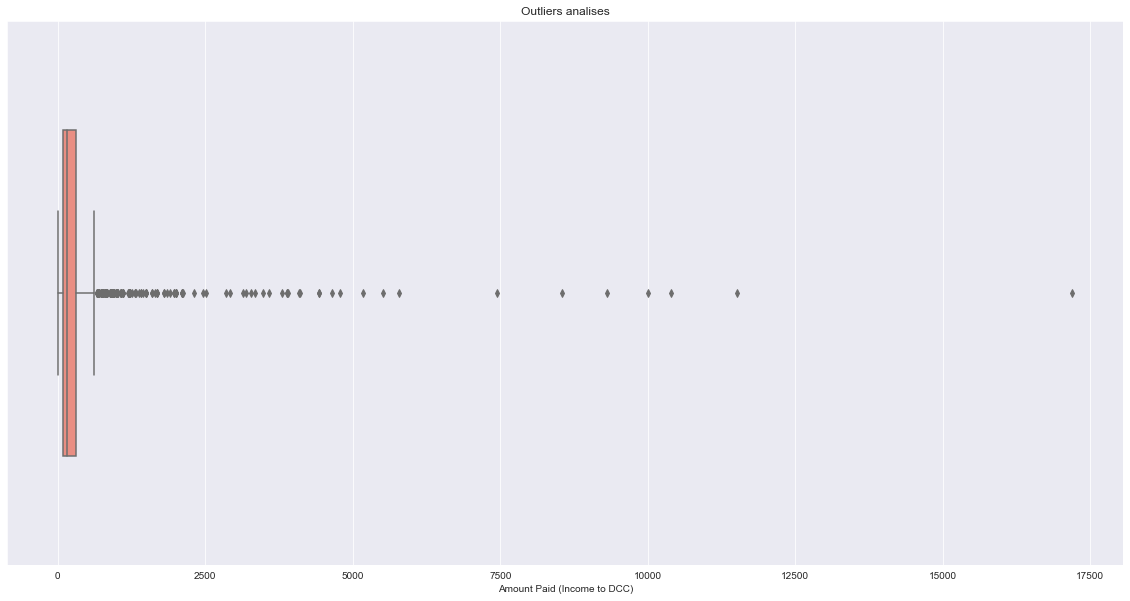

In [56]:

fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(x=df['Amount Paid'], color="salmon", width=0.6)
ax.set_xlabel('Amount Paid (Income to DCC)')
plt.title('Outliers analises')
plt.show()

In [57]:
df.describe()

,No of Spaces,Amount Paid,year,month,day,No days suspended
count,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000
mean,7.548541,320.040918,2007.769010,6.325681,15.720230,14.032999
std,16.888033,792.609144,1.564779,3.242895,8.641541,253.687464
min,1.000000,0.000000,2006.000000,1.000000,1.000000,1.000000
25%,3.000000,82.000000,2006.000000,4.000000,8.000000,1.000000
50%,4.000000,152.000000,2008.000000,6.000000,16.000000,1.000000
75%,6.000000,300.000000,2009.000000,9.000000,23.000000,2.000000
max,150.000000,17201.000000,2011.000000,12.000000,31.000000,10959.000000



## Short analysis statistics of the target feature:  Amount Paid<a name="OutliersII"></a>

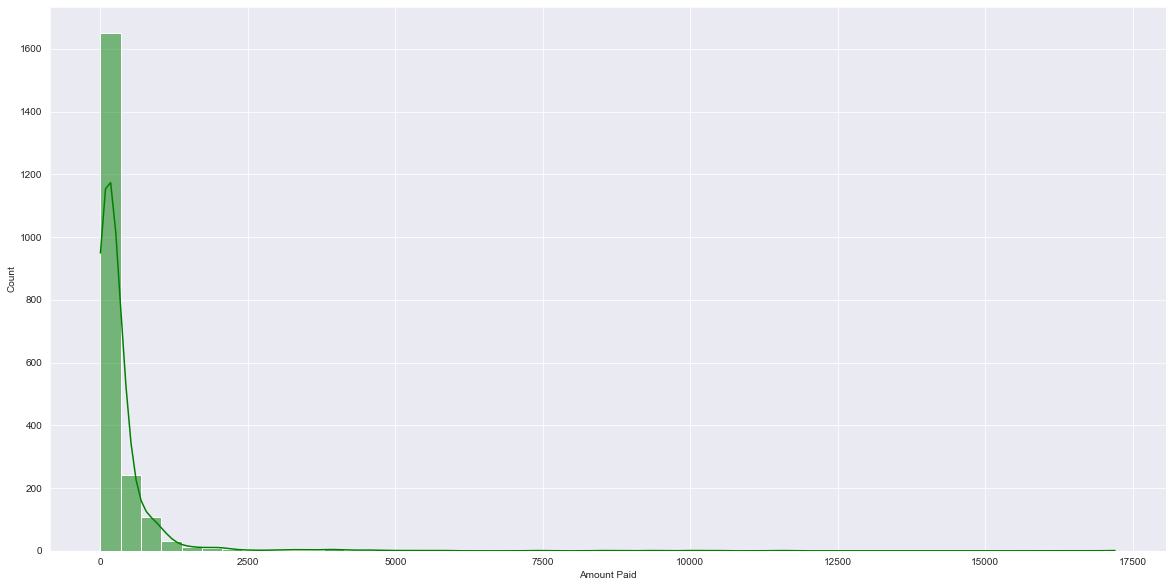

In [58]:
fig = plt.figure(figsize=(20, 10))
sns.histplot(df['Amount Paid'], color='green', kde=True , bins=50)
plt.show()

In [59]:
from scipy.stats import skew
from scipy.stats import norm, kurtosis

# skew() and Kurt() functions from the SciPy Stata library
#calculate skewness
print('\n  Skewness of the target feature:  ', skew(df['Amount Paid'], bias=False))
print('\n  mean:  ', df['Amount Paid'].mean())
print('\n  median:  ', df['Amount Paid'].median())
#print('\n  mode:  ', dfperMonth['Amount Paid'].mode())

#calculate kurtosis
print('\n  Kurtosis of the target feature:  ', kurtosis(df['Amount Paid'], bias=False))



  Skewness of the target feature:   10.712605913861717

  mean:   320.04091822094693

  median:   152.0

  Kurtosis of the target feature:   161.2100720720329


## Skewness show a right skew (positive skew)<a name="OutliersIII"></a>

Skewness show a right skew (positive skew) therefore mean > median, in general, 
if skewness is between -1 and -0.5 or between 0.5 and 1 the distribution is moderately skewed.

In this case the distribution is highly skewness consecuense of the outliers values.

For kurtosis, the general guideline is that if the number is greater than +1, the distribution is too peaked. Likewise, a kurtosis of less than –1 indicates a distribution that is too flat. 

In this case the distribution of the features has a heavy peak, Kurtosis.

https://www.scribbr.com/category/statistics/




## Identify outliers in the other numerical variables<a name="OutliersIV"></a>

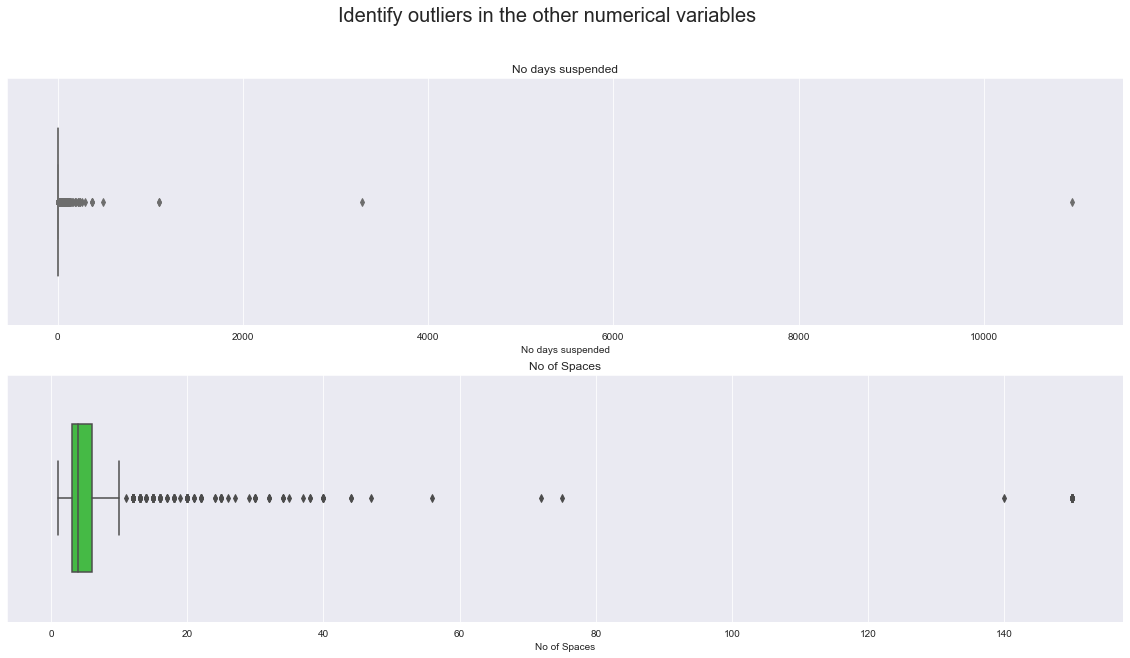

In [60]:

fig, axes = plt.subplots(2, 1, figsize=(20, 10)) 
fig.suptitle('Identify outliers in the other numerical variables',fontsize=20)

sns.boxplot(df['No days suspended'], ax=axes[0], color='salmon', width=0.6)
axes[0].set_title('No days suspended')

sns.boxplot(df['No of Spaces'], ax=axes[1], color='limegreen', width=0.6)
axes[1].set_title('No of Spaces')

plt.show()

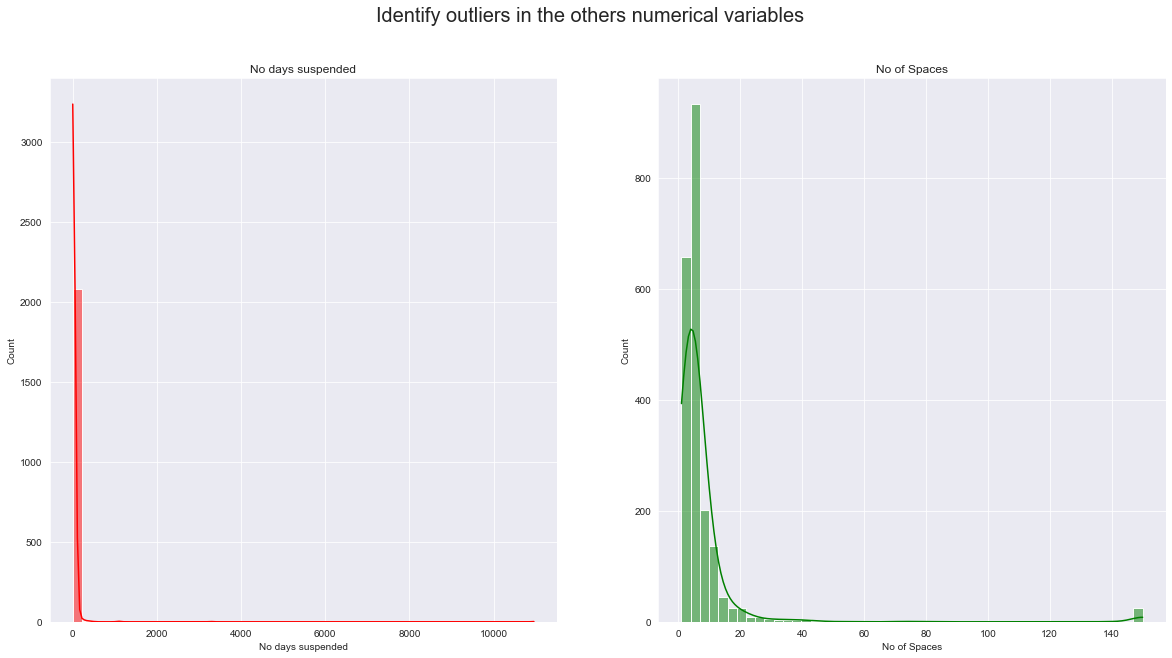

In [61]:

fig, axes = plt.subplots(1, 2, figsize=(20, 10)) 
fig.suptitle('Identify outliers in the others numerical variables', fontsize=20)

sns.histplot(df['No days suspended'], ax=axes[0], kde=True, color='red', bins=50)
axes[0].set_title('No days suspended')

sns.histplot(df['No of Spaces'], ax=axes[1], kde=True, color='green', bins=50)
axes[1].set_title('No of Spaces')

plt.show()



In [62]:
df['year'].unique(),df['month'].unique(),df['day'].unique()

(array([2006, 2007, 2009, 2008, 2010, 2011]),
 array([ 1,  2,  3,  4,  5,  6,  8,  7,  9, 10, 11, 12]),
 array([20, 18,  5,  6, 10, 12, 13, 17, 23, 24, 25, 26, 27, 31,  1,  8,  9,
        16, 21, 22, 28,  2,  3,  7, 14, 15, 29,  4, 19, 30, 11]))

# Tukey fence method<a name="OutliersV"></a>

### Tukey distinguishes between the inner and the outer fence.

### A possible outlier is located between the inner and the outer fence, the strategy will be change outliers outside of the inner fence.

The great advantage of Tukey’s box plot method is that the statistics (e.g. IQR, inner and outer fence) are robust to outliers, meaning to find one
outlier is independent of all other outliers. 
Furthermore, this method does not require a normal distribution of the data.

The distribution of the target feature DF['Amount Paid'] is highly skewed.

The robust methods is replace the outliers by the median, in this case more appropiate because the target feature is skewed. 




In [63]:
df_original = df.copy() # Modifications to the data or indices of the copy will not be reflected in the original object 

# roll back

#df = df_original.copy(

In [64]:

def tukeys_method(df, feature):
    # calculate Q1 and Q3
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    print('Q1: ',q1)
    print('Q3: ',q3)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end corresponding with 1.5 IQR point
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    print(inner_fence_ue)
    #outer fence lower and upper end corresponding with 3.0 IQR point
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_outer = []
    outliers_inner = []
    # outer fence
    for index, x in enumerate(df[feature]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_outer.append(index)
    # inner fence
    for index, x in enumerate(df[feature]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_inner.append(index)
    
    return outliers_outer, outliers_inner # return the index of the outliers in inner fence and outer fence
        


In [65]:
# Search for tukey fence on the target features 'Amount Paid'
outliers_outer_indexes, outliers_inner_indexes = tukeys_method(df, 'Amount Paid')

print('Outer index:  ', outliers_outer_indexes)
print('\n  Inner index:  ', outliers_inner_indexes)

Q1:  82.0
Q3:  300.0
627.0
Outer index:   [15, 33, 91, 115, 118, 130, 162, 196, 209, 213, 218, 243, 244, 250, 252, 285, 294, 295, 318, 375, 376, 401, 404, 431, 460, 464, 465, 494, 606, 638, 680, 703, 799, 805, 832, 857, 865, 869, 874, 883, 885, 891, 902, 905, 908, 915, 932, 934, 940, 942, 966, 967, 993, 1009, 1024, 1033, 1036, 1062, 1067, 1068, 1075, 1109, 1114, 1126, 1174, 1175, 1189, 1288, 1331, 1339, 1357, 1381, 1425, 1459, 1465, 1466, 1467, 1484, 1496, 1500, 1504, 1549, 1597, 1617, 1618, 1683, 1686, 1720, 1721, 1758, 1768, 1848, 1850, 1851, 1875, 1877, 1888, 1889, 1909, 1979, 1982, 2049, 2057]

  Inner index:   [15, 16, 18, 21, 33, 36, 44, 53, 59, 76, 83, 91, 93, 114, 115, 117, 118, 119, 124, 129, 130, 131, 153, 162, 181, 185, 196, 209, 213, 217, 218, 220, 223, 234, 235, 243, 244, 250, 252, 255, 256, 283, 284, 285, 286, 287, 294, 295, 315, 317, 318, 327, 329, 345, 346, 359, 360, 375, 376, 391, 401, 404, 406, 414, 428, 431, 432, 437, 449, 455, 460, 464, 465, 494, 509, 516, 517, 518,

In [66]:
df[df['Amount Paid']>627]

,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
15,160 Shelbourne Road,5.0,Access to Site,5510.0,2006,1,13,45
16,Gloucester Street,4.0,To allow free flow of traffic,912.0,2006,1,13,5
18,Gloucester Street,4.0,To allow access to Loading Bay,912.0,2006,1,5,5
21,Gloucester Street,4.0,To allow access to Loading Bay,912.0,2006,1,13,5
33,Parnell Square North,5.0,Compound Area to store spoil,10400.0,2006,1,25,55
...,...,...,...,...,...,...,...,...
1980,Henrietta Street,27.0,Filming,1680.0,2010,12,9,4
1983,Nutley Lane (Opposite 71/73),2.0,Temporary Site Access,10000.0,2010,12,15,486
2001,Strand Street Great,7.0,Loading and Unloading for a conference at Mor...,700.0,2011,2,8,2
2050,Clonmel Street,10.0,Facilitate the build up for Event in Iveagh Ga...,2000.0,2011,4,28,5


In [67]:
df.iloc[outliers_inner_indexes]['Amount Paid'] # 205 outliers out of the inner fence

15       5510.0
16        912.0
18        912.0
21        912.0
33      10400.0
         ...   
1980     1680.0
1983    10000.0
2001      700.0
2050     2000.0
2058     1600.0
Name: Amount Paid, Length: 205, dtype: float64

In [68]:
df.iloc[outliers_outer_indexes]['Amount Paid'].values # 103 outliers out of the outer fence


array([ 5510. , 10400. ,  8550. ,  2850. ,  1672. ,  3470. ,  1330. ,
        1400. ,  5168. ,  1368. ,   988. ,  1064. ,  1064. ,  1400. ,
        3192. ,  1976. ,  1064. ,  1064. ,  5776. ,  1064. ,  1064. ,
        3876. ,  2100. ,  2918. ,  2100. ,  1900. ,  1064. ,  4082. ,
        3344. ,  3572. ,  3891.2,  9302.4,  1500. ,  7448. ,  2125.2,
        1254. ,  1000. ,  1000. ,  1025. ,  4776.2,  2302.3,  3280. ,
        4428. ,  4428. ,  1640. ,  1302.6,  4100. ,  1230. ,  1197. ,
        1002. ,  3795. ,  1672. ,  1107. ,  1107. ,  1066. , 17201. ,
        1066. ,  1066. ,  2508. ,  1066. ,  2460. ,  1230. ,  1002. ,
        1230. ,  1968. ,  2000. ,  1002. ,  1197. ,  1845. ,  1102. ,
       11521. ,  1002. ,  1200.3,  1200. ,  1200. ,  1312. ,  1600. ,
        1500. ,  1000. ,  2000. ,  1190. ,  2100. ,  1000. ,  1200. ,
        1200. ,  1500. ,  1000. ,  3900. ,  3140. ,  2000. ,  4650. ,
        1800. ,  1200. ,  1450. ,  1000. ,  1800. ,  1000. ,   984. ,
        1500. ,  168


## Strategic deal with outliers<a name="OutliersVI"></a>

there are three options with deal with outliers:
- delete (the worst because lost information)
- replace by mean (introduce bias, especially it is not normal distribution)
- replace by a median, it is a more robust method because the median is not affected by the outliers
- replace using one estimator based on the values of the row, using sklearn imputer
   (https://scikit-learn.org/stable/modules/impute.html#iterative-imputer)

In this case replacing by median will be good enough because it is not dependent on the other features and it is robust.

. 



In [69]:


def tukeys_replace(df, feature, estimator):
    df[feature].replace(to_replace=df.iloc[outliers_inner_indexes][feature].values, # use iloc
    value=estimator,
    inplace=True)
    return 




In [70]:
df['year'].unique(),df['month'].unique(),df['day'].unique()

(array([2006, 2007, 2009, 2008, 2010, 2011]),
 array([ 1,  2,  3,  4,  5,  6,  8,  7,  9, 10, 11, 12]),
 array([20, 18,  5,  6, 10, 12, 13, 17, 23, 24, 25, 26, 27, 31,  1,  8,  9,
        16, 21, 22, 28,  2,  3,  7, 14, 15, 29,  4, 19, 30, 11]))



## Replace Outliers target feature 'Amount Paid' out of the inner fence<a name="OutliersVII"></a>

In [71]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Location of Spaces,Commons Street (IFSC),St Stephens Green,Stephens Green,Stephens Green (Loreto College),Molesworth Street,Whitefriars,Townsend Street,Mount St Crescent (Sp. Surrounding Peppercanis...,Military Road 9 Off Rathmines Road).,Lennox Street (Off South Richmond Street),Ely Place,Stephens Green,Lansdowne Road,York Street,Vicar Street,160 Shelbourne Road,Gloucester Street,York Street,Gloucester Street,Townsend Street
No of Spaces,5.0,3.0,4.0,4.0,12.0,2.0,2.0,6.0,6.0,6.0,4.0,4.0,4.0,5.0,8.0,5.0,4.0,4.0,4.0,2.0
Purpose,Parking Catering Vehicles,Collection from KPMG,To facilate filiming,Road Caster,To facilate Filiming,Furniture removal,To allow access to loading Bay,To facilate filiming,For Site Compound,For Site Company,For Loading Purposes,Outside Broadcast Unit,Outside Broadcast Unit,Official Launch,Television Recording,Access to Site,To allow free flow of traffic,Official Launch,To allow access to Loading Bay,To allow access to Loading Bay
Amount Paid,152.0,114.0,152.0,152.0,152.0,60.8,456.0,200.0,0.0,0.0,152.0,0.0,152.0,190.0,608.0,5510.0,912.0,152.0,912.0,456.0
year,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
day,20,18,5,5,5,5,5,6,6,6,10,12,12,18,12,13,13,17,5,13
No days suspended,1,1,1,1,1,1,370,2,244,244,1,1,1,1,2,45,5,1,5,5


In [72]:
median = df['Amount Paid'].median().astype('float64')
print(median)
tukeys_replace(df, 'Amount Paid', median)

152.0


In [73]:
#df.iloc[outliers_inner_indexes]['Amount Paid']
df.iloc[outliers_inner_indexes] #['Amount Paid']

,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
15,160 Shelbourne Road,5.0,Access to Site,152.0,2006,1,13,45
16,Gloucester Street,4.0,To allow free flow of traffic,152.0,2006,1,13,5
18,Gloucester Street,4.0,To allow access to Loading Bay,152.0,2006,1,5,5
21,Gloucester Street,4.0,To allow access to Loading Bay,152.0,2006,1,13,5
33,Parnell Square North,5.0,Compound Area to store spoil,152.0,2006,1,25,55
...,...,...,...,...,...,...,...,...
1980,Henrietta Street,27.0,Filming,152.0,2010,12,9,4
1983,Nutley Lane (Opposite 71/73),2.0,Temporary Site Access,152.0,2010,12,15,486
2001,Strand Street Great,7.0,Loading and Unloading for a conference at Mor...,152.0,2011,2,8,2
2050,Clonmel Street,10.0,Facilitate the build up for Event in Iveagh Ga...,152.0,2011,4,28,5


In [74]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Location of Spaces,Commons Street (IFSC),St Stephens Green,Stephens Green,Stephens Green (Loreto College),Molesworth Street,Whitefriars,Townsend Street,Mount St Crescent (Sp. Surrounding Peppercanis...,Military Road 9 Off Rathmines Road).,Lennox Street (Off South Richmond Street),Ely Place,Stephens Green,Lansdowne Road,York Street,Vicar Street,160 Shelbourne Road,Gloucester Street,York Street,Gloucester Street,Townsend Street
No of Spaces,5.0,3.0,4.0,4.0,12.0,2.0,2.0,6.0,6.0,6.0,4.0,4.0,4.0,5.0,8.0,5.0,4.0,4.0,4.0,2.0
Purpose,Parking Catering Vehicles,Collection from KPMG,To facilate filiming,Road Caster,To facilate Filiming,Furniture removal,To allow access to loading Bay,To facilate filiming,For Site Compound,For Site Company,For Loading Purposes,Outside Broadcast Unit,Outside Broadcast Unit,Official Launch,Television Recording,Access to Site,To allow free flow of traffic,Official Launch,To allow access to Loading Bay,To allow access to Loading Bay
Amount Paid,152.0,114.0,152.0,152.0,152.0,60.8,456.0,200.0,0.0,0.0,152.0,0.0,152.0,190.0,608.0,152.0,152.0,152.0,152.0,456.0
year,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
day,20,18,5,5,5,5,5,6,6,6,10,12,12,18,12,13,13,17,5,13
No days suspended,1,1,1,1,1,1,370,2,244,244,1,1,1,1,2,45,5,1,5,5


In [75]:
df['year'].unique(),df['month'].unique(),df['day'].unique()

(array([2006, 2007, 2009, 2008, 2010, 2011]),
 array([ 1,  2,  3,  4,  5,  6,  8,  7,  9, 10, 11, 12]),
 array([20, 18,  5,  6, 10, 12, 13, 17, 23, 24, 25, 26, 27, 31,  1,  8,  9,
        16, 21, 22, 28,  2,  3,  7, 14, 15, 29,  4, 19, 30, 11]))


## Replace Outliers out of the inner fence<a name="OutliersVIII"></a>

Analises the outliers of two features numerics: 'No of Spaces' and 'No days suspended

Replace Outliers out of the inner fence

In [76]:
# Numerical variables related with the df['Amount Paid'] are: df['No of Spaces'], df['No days suspended']
df['No of Spaces'].mean(), df['No days suspended'].median()

(7.548541367766619, 1.0)

### Outliers 'No of Spaces'

Search for tukey fence on the target features 'No of Spaces'

In [77]:
# Search for tukey fence on the target features 'No of Spaces'
outliers_outer_indexes, outliers_inner_indexes = tukeys_method(df, 'No of Spaces')

print('Outer index:  ', outliers_outer_indexes)
print('\n  Inner index:  ', outliers_inner_indexes)

Q1:  3.0
Q3:  6.0
10.5
Outer index:   [99, 114, 115, 118, 119, 124, 129, 149, 150, 172, 215, 217, 225, 275, 296, 301, 371, 379, 401, 414, 447, 448, 464, 470, 471, 478, 495, 500, 502, 515, 516, 517, 530, 554, 593, 595, 603, 604, 605, 609, 610, 688, 727, 737, 766, 796, 819, 831, 839, 846, 847, 848, 851, 853, 859, 865, 866, 867, 868, 869, 871, 874, 882, 908, 926, 927, 928, 936, 937, 940, 967, 971, 1008, 1018, 1114, 1141, 1168, 1189, 1193, 1198, 1199, 1215, 1235, 1288, 1307, 1315, 1317, 1320, 1325, 1367, 1368, 1369, 1402, 1408, 1425, 1451, 1466, 1467, 1500, 1501, 1504, 1507, 1542, 1544, 1545, 1546, 1597, 1608, 1628, 1641, 1663, 1679, 1682, 1683, 1720, 1721, 1762, 1768, 1788, 1802, 1803, 1804, 1807, 1811, 1848, 1850, 1851, 1877, 1884, 1887, 1888, 1896, 1909, 1977, 1979, 1998, 2057, 2066, 2067, 2068]

  Inner index:   [4, 99, 114, 115, 118, 119, 124, 129, 149, 150, 172, 213, 215, 217, 225, 240, 275, 296, 301, 309, 371, 379, 401, 414, 441, 442, 447, 448, 449, 464, 465, 470, 471, 478, 490, 491

In [78]:
df[df['No of Spaces']>10.5]

,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
4,Molesworth Street,12.0,To facilate Filiming,152.0,2006,1,5,1
99,Herbert Park,19.0,Filming,577.6,2006,3,14,1
114,St. Stephens Green South,25.0,Parking of Film Vehicles,152.0,2006,3,22,1
115,St. Stephens Green South,25.0,Parking of Film Vehicles,152.0,2006,3,22,3
118,Henrietta Street,22.0,Parking of Film Vehicles,152.0,2006,3,22,2
...,...,...,...,...,...,...,...,...
1999,Henrietta Street,15.0,Filming,0.0,2011,2,8,1
2058,Fitzwilliam Square South,32.0,In order to park 4 toilet facility for an even...,152.0,2011,5,17,1
2067,Merrion Square North,34.0,To extend the footpath on Merrion Square North...,0.0,2011,5,30,2
2068,Fitzwilliam Street Lower,18.0,Loading and unloading equipment into Merrion S...,0.0,2011,5,30,3


In [79]:
df.iloc[outliers_inner_indexes]['No of Spaces']   # 208 outliers out of the inner fence

4       12.0
99      19.0
114     25.0
115     25.0
118     22.0
        ... 
1999    15.0
2058    32.0
2067    34.0
2068    18.0
2069    16.0
Name: No of Spaces, Length: 208, dtype: float64

In [80]:
df['No of Spaces'].mean().astype('int64')

7

In [81]:
mean = df['No of Spaces'].mean().astype('int64')
tukeys_replace(df, 'No of Spaces', mean)

In [82]:
df.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Location of Spaces,Commons Street (IFSC),St Stephens Green,Stephens Green,Stephens Green (Loreto College),Molesworth Street,Whitefriars,Townsend Street,Mount St Crescent (Sp. Surrounding Peppercanis...,Military Road 9 Off Rathmines Road).,Lennox Street (Off South Richmond Street),...,Townsend Street,Gloucester Street,Molesworth Street,Adjacent to Herbert Park (Ballsbridge End),Duke Lane of South Anne Street,Northwall Quay,Northwall Quay,Nutley Avenue,St Stephens Green,Foley Street
No of Spaces,5.0,3.0,4.0,4.0,7.0,2.0,2.0,6.0,6.0,6.0,...,2.0,4.0,5.0,5.0,6.0,4.0,4.0,8.0,4.0,1.0
Purpose,Parking Catering Vehicles,Collection from KPMG,To facilate filiming,Road Caster,To facilate Filiming,Furniture removal,To allow access to loading Bay,To facilate filiming,For Site Compound,For Site Company,...,To allow access to Loading Bay,To allow access to Loading Bay,Parking Catering Vehicle,Parking Catering Vehicles,Parking Catering Vehicles,Outside Broadcast,Outside Broadcast,Parking of Filming Vehicles,Outside Broadcast,Moving Premises
Amount Paid,152.0,114.0,152.0,152.0,152.0,60.8,456.0,200.0,0.0,0.0,...,456.0,152.0,190.0,152.0,228.0,121.6,121.6,201.1,152.0,30.4
year,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,...,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
month,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
day,20,18,5,5,5,5,5,6,6,6,...,5,13,20,20,20,20,20,20,23,24
No days suspended,1,1,1,1,1,1,370,2,244,244,...,5,5,1,1,1,1,1,1,1,1


In [83]:
df['year'].unique(),df['month'].unique(),df['day'].unique()

(array([2006, 2007, 2009, 2008, 2010, 2011]),
 array([ 1,  2,  3,  4,  5,  6,  8,  7,  9, 10, 11, 12]),
 array([20, 18,  5,  6, 10, 12, 13, 17, 23, 24, 25, 26, 27, 31,  1,  8,  9,
        16, 21, 22, 28,  2,  3,  7, 14, 15, 29,  4, 19, 30, 11]))

### Outliers 'No days suspended'

Search for tukey fence on the target features

In [84]:
# Search for tukey fence on the target features 
outliers_outer_indexes, outliers_inner_indexes = tukeys_method(df, 'No days suspended')

print('Outer index:  ', outliers_outer_indexes)
print('\n  Inner index:  ', outliers_inner_indexes)

Q1:  1.0
Q3:  2.0
3.5
Outer index:   [6, 8, 9, 15, 16, 18, 19, 20, 21, 33, 34, 35, 36, 42, 43, 44, 52, 53, 56, 58, 59, 69, 73, 74, 75, 76, 82, 83, 91, 92, 93, 103, 111, 125, 126, 127, 130, 132, 145, 148, 149, 150, 151, 162, 167, 168, 180, 181, 182, 185, 189, 194, 197, 202, 205, 208, 209, 218, 220, 223, 233, 234, 235, 236, 243, 244, 245, 249, 252, 253, 255, 256, 257, 259, 283, 284, 285, 286, 287, 288, 294, 295, 299, 300, 302, 305, 315, 316, 317, 318, 322, 323, 327, 328, 329, 330, 345, 346, 352, 358, 359, 360, 362, 364, 368, 375, 376, 391, 394, 398, 406, 409, 411, 412, 427, 428, 429, 431, 432, 436, 437, 454, 455, 457, 458, 463, 467, 468, 482, 483, 490, 494, 503, 509, 521, 536, 544, 565, 570, 574, 606, 613, 615, 638, 648, 667, 668, 669, 680, 697, 703, 722, 723, 727, 737, 745, 746, 750, 753, 771, 794, 795, 799, 805, 819, 832, 835, 842, 843, 846, 847, 857, 883, 885, 891, 900, 902, 905, 913, 914, 919, 929, 930, 931, 932, 938, 939, 966, 993, 1007, 1009, 1010, 1033, 1035, 1038, 1039, 1046, 105

In [85]:
df[df['No days suspended']>3.5]

,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
6,Townsend Street,2.0,To allow access to loading Bay,456.0,2006,1,5,370
8,Military Road 9 Off Rathmines Road).,6.0,For Site Compound,0.0,2006,1,6,244
9,Lennox Street (Off South Richmond Street),6.0,For Site Company,0.0,2006,1,6,244
15,160 Shelbourne Road,5.0,Access to Site,152.0,2006,1,13,45
16,Gloucester Street,4.0,To allow free flow of traffic,152.0,2006,1,13,5
...,...,...,...,...,...,...,...,...
2017,Merrion Square West,2.0,St. Patricks Day Festival,0.0,2011,3,7,8
2050,Clonmel Street,10.0,Facilitate the build up for Event in Iveagh Ga...,152.0,2011,4,28,5
2069,Fitzwilliam Street Lower,7.0,Portakabin for Festival equipment,0.0,2011,5,30,8
2078,North Wall Quay (outside old Tile Style building),6.0,parking generator for event in building,405.0,2011,6,8,4


In [86]:
df.iloc[outliers_inner_indexes]

,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
6,Townsend Street,2.0,To allow access to loading Bay,456.0,2006,1,5,370
8,Military Road 9 Off Rathmines Road).,6.0,For Site Compound,0.0,2006,1,6,244
9,Lennox Street (Off South Richmond Street),6.0,For Site Company,0.0,2006,1,6,244
15,160 Shelbourne Road,5.0,Access to Site,152.0,2006,1,13,45
16,Gloucester Street,4.0,To allow free flow of traffic,152.0,2006,1,13,5
...,...,...,...,...,...,...,...,...
2017,Merrion Square West,2.0,St. Patricks Day Festival,0.0,2011,3,7,8
2050,Clonmel Street,10.0,Facilitate the build up for Event in Iveagh Ga...,152.0,2011,4,28,5
2069,Fitzwilliam Street Lower,7.0,Portakabin for Festival equipment,0.0,2011,5,30,8
2078,North Wall Quay (outside old Tile Style building),6.0,parking generator for event in building,405.0,2011,6,8,4


In [87]:
df['No days suspended'].median().astype('int64')

1

In [88]:
  # 332 outliers out of the inner fence

In [89]:
median = df['No days suspended'].median().astype('int64')
tukeys_replace(df, 'No days suspended', median)

In [90]:
df.iloc[outliers_inner_indexes] #['No days suspended']

,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
6,Townsend Street,2.0,To allow access to loading Bay,456.0,2006,1,5,1
8,Military Road 9 Off Rathmines Road).,6.0,For Site Compound,0.0,2006,1,6,1
9,Lennox Street (Off South Richmond Street),6.0,For Site Company,0.0,2006,1,6,1
15,160 Shelbourne Road,5.0,Access to Site,152.0,2006,1,13,1
16,Gloucester Street,4.0,To allow free flow of traffic,152.0,2006,1,13,1
...,...,...,...,...,...,...,...,...
2017,Merrion Square West,2.0,St. Patricks Day Festival,0.0,2011,3,7,1
2050,Clonmel Street,10.0,Facilitate the build up for Event in Iveagh Ga...,152.0,2011,4,28,1
2069,Fitzwilliam Street Lower,7.0,Portakabin for Festival equipment,0.0,2011,5,30,1
2078,North Wall Quay (outside old Tile Style building),6.0,parking generator for event in building,405.0,2011,6,8,1


In [91]:
df.tail(20).T

,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091
Location of Spaces,Wolfe Tone Street,Swifts Row,Merrion Road,Ballsbridge Avenue,Merrion Road,Ballsbridge Avenue,North Wall Quay (outside old Tile Style building),Windmill Lane,Corner of Jamestown Road/Ballygall Road West,Fassaugh Avenue,Barry Road Car Park,Fishamble Street,Merrion Road,Ballsbridge Avenue,Merrion Road,Ballsbridge Avenue,Merrion Road,Ballsbridge Avenue,Fairview Strand,Marlborough Street
No of Spaces,2.0,2.0,6.0,2.0,6.0,2.0,6.0,5.0,2.0,2.0,2.0,2.0,6.0,2.0,6.0,2.0,6.0,2.0,6.0,1.0
Purpose,Repair of Boardwalk,Repair of Boardwalk,Rugby fanzone,Temporary loading bay,Rugby fanzone,Temporary loading bay,parking generator for event in building,filming,Information service to the public,Information service to the public,Information Service to the public,98FM Bus for mayo Alive Festival,Rugby fanzone,Temporary loading bay,Rugby fanzone,Temporary loading bay,Rugby fanzone,Temporary loading bay,Roadhog,Shopfitters on Site at Sony Centre
Amount Paid,0.0,0.0,246.0,82.0,246.0,82.0,405.0,205.0,0.0,0.0,0.0,41.0,246.0,82.0,246.0,82.0,246.0,82.0,114.0,200.0
year,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
month,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
day,1,1,1,1,1,1,8,9,10,10,10,14,14,14,14,14,14,14,14,28
No days suspended,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1



## Review the data after the apply tukey fence method to deal with outliers<a name="OutliersVIX"></a>

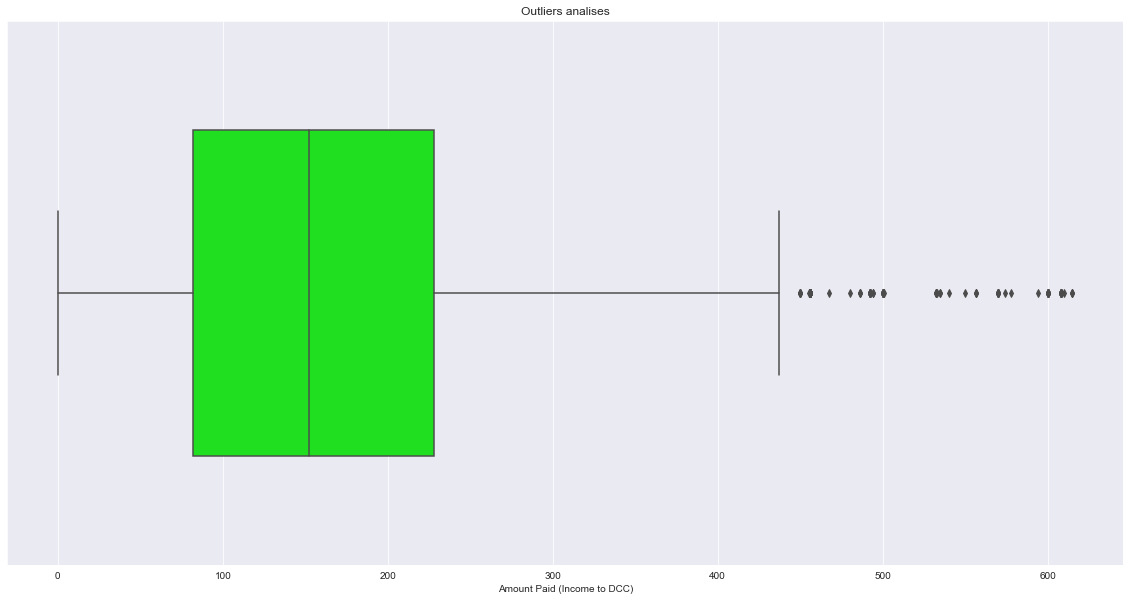

In [92]:
fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(x=df['Amount Paid'], color="lime", width=0.6)
ax.set_xlabel('Amount Paid (Income to DCC)')
plt.title('Outliers analises')
plt.show()

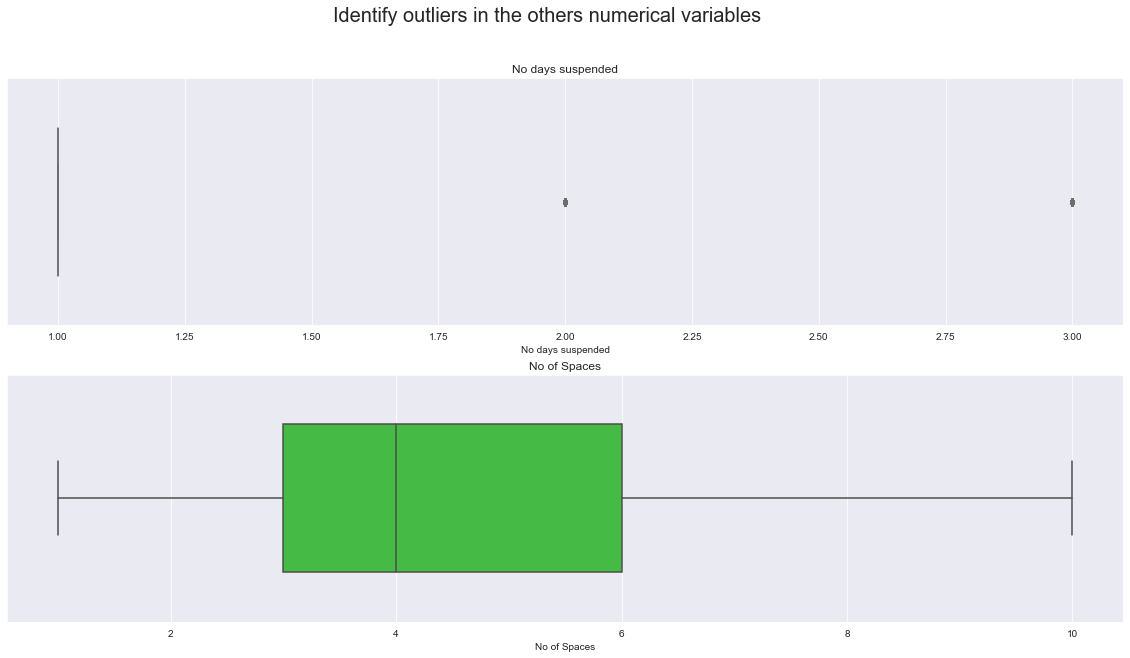

In [93]:

fig, axes = plt.subplots(2, 1, figsize=(20, 10)) #, sharey=True)
fig.suptitle('Identify outliers in the others numerical variables',fontsize=20)

sns.boxplot(df['No days suspended'], ax=axes[0], color='salmon', width=0.6)
axes[0].set_title('No days suspended')

sns.boxplot(df['No of Spaces'], ax=axes[1], color='limegreen', width=0.6)
axes[1].set_title('No of Spaces')

plt.show()


## Comparative before and after apply tukey method<a name="OutliersVX"></a>

The data show a considerable reduction of the outliers values

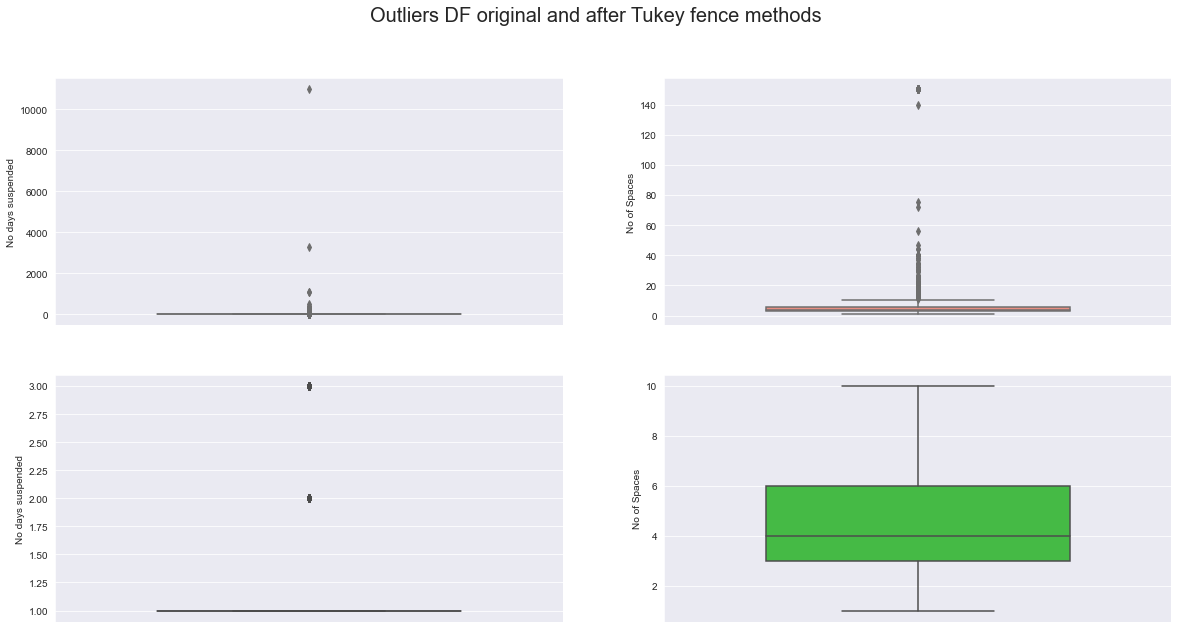

In [94]:
data1 = df_original[['No days suspended', 'No of Spaces']]
data2 = df[['No days suspended', 'No of Spaces']]
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
index = 0

for i,j in data2.items():
    sns.boxplot(y=i, data=data1, ax=ax1[index], color='salmon', width=0.6)
    sns.boxplot(y=i, data=data2, ax=ax2[index], color='limegreen', width=0.6)
    index += 1
fig.suptitle('Outliers DF original and after Tukey fence methods', fontsize=20)
plt.show()

In [95]:

df['year'].unique(),df['month'].unique(),df['day'].unique()

(array([2006, 2007, 2009, 2008, 2010, 2011]),
 array([ 1,  2,  3,  4,  5,  6,  8,  7,  9, 10, 11, 12]),
 array([20, 18,  5,  6, 10, 12, 13, 17, 23, 24, 25, 26, 27, 31,  1,  8,  9,
        16, 21, 22, 28,  2,  3,  7, 14, 15, 29,  4, 19, 30, 11]))



## Difference values in Purpose and Location of Spaces<a name="OutliersVXI"></a>

Trying to categorise or better clusterizing the data using these features is not affordable because there are many different observations so the strategy is clustering the data with a number of classes more handleable and could have predicted the income (target feature 'Amount Paid') to Dublin City Council for the next month.

In [96]:
df['Purpose'].nunique()

728

In [97]:
df['Location of Spaces'].nunique()

862


# Statistical analysis of data: EDA<a name="Sta"></a>

Note that the data contains:

- Two nominal features: Location of Spaces and Purposse

- Two numerical features: No of Spaces and No days suspended

- Three features: day, month, and year that will be treated as numerical

- Target feature: numerical value 'Amount Paid' that means income received DCC

.


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2091
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location of Spaces  2091 non-null   object 
 1   No of Spaces        2091 non-null   float64
 2   Purpose             2091 non-null   object 
 3   Amount Paid         2091 non-null   float64
 4   year                2091 non-null   int64  
 5   month               2091 non-null   int64  
 6   day                 2091 non-null   int64  
 7   No days suspended   2091 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 211.6+ KB



## Describe nominal features:  'Purpose', 'Location of Spaces'<a name="StaI"></a>


In [99]:
print('\n Number of diference values: ', df['Purpose'].nunique())
print('\n Most frequency value (mode): % s ' % statistics.mode(df['Purpose']))
print('\n Top 10 values: \n')
pd.DataFrame(df['Purpose'].value_counts()).head(10)


 Number of diference values:  728

 Most frequency value (mode): Filming 

 Top 10 values: 



,Purpose
Filming,237
Outside Broadcast,108
Film Vehicles,92
Roadhog,60
Film Unit,55
Filiming Vehicles,47
FM104 Roadhog,42
Broadcast,37
To allow traffic to flow while loading,35
Blood Donation Clinic,33


In [100]:
print('\n Number of diference values: ', df['Location of Spaces'].nunique())
print('\n Most frequency value (mode): % s ' % statistics.mode(df['Location of Spaces']))
print('\n Top 10 values: \n')
pd.DataFrame(df['Location of Spaces'].value_counts()).head(10)


 Number of diference values:  862

 Most frequency value (mode): Townsend Street 

 Top 10 values: 



,Location of Spaces
Townsend Street,38
Gloucester Street,34
Temple Street,28
Clonmel Street,25
Fishamble Street,25
St. Stephens Green North,24
Eccles Street,22
Merrion Road,21
Hatch Street,21
Molesworth Street,19


In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No of Spaces,2091.0,4.699187,2.227040,1.0,3.0,4.0,6.0,10.0
Amount Paid,2091.0,168.328991,136.411565,0.0,82.0,152.0,228.0,615.0
year,2091.0,2007.769010,1.564779,2006.0,2006.0,2008.0,2009.0,2011.0
month,2091.0,6.325681,3.242895,1.0,4.0,6.0,9.0,12.0
day,2091.0,15.720230,8.641541,1.0,8.0,16.0,23.0,31.0
No days suspended,2091.0,1.192253,0.511455,1.0,1.0,1.0,1.0,3.0



## General visualization of the data using scatter plot and histogram<a name="StaII"></a>

<Figure size 4320x2160 with 0 Axes>

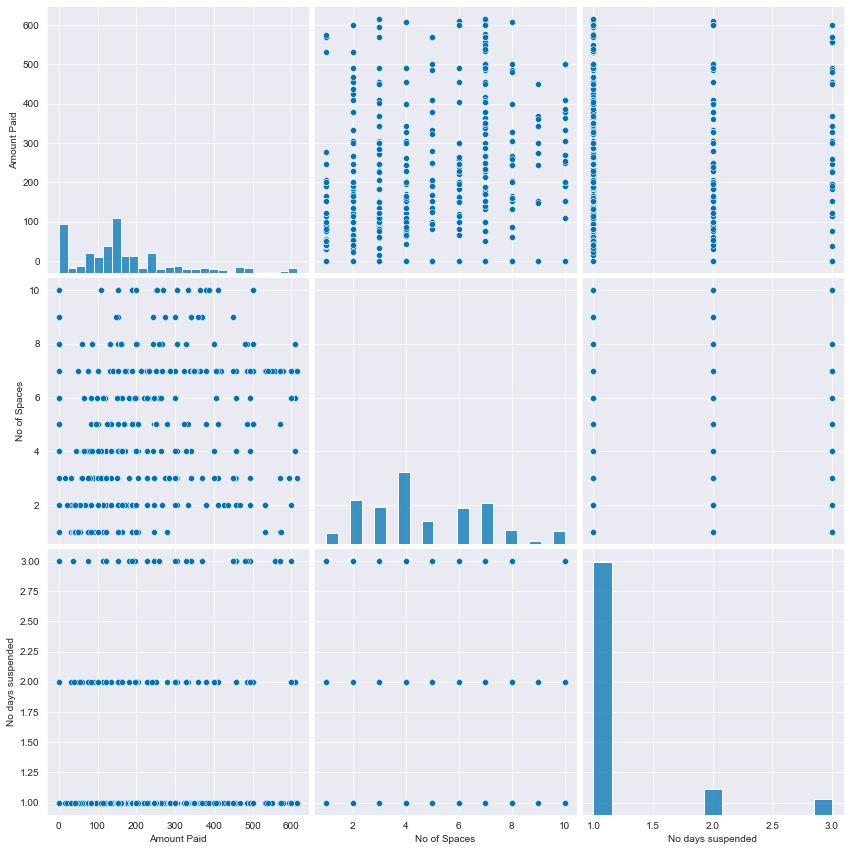

(None,)

In [102]:
# Visualize the data using scatter plot and histogram
fig = plt.figure(figsize=(60, 30))
sns.set_palette('colorblind')
sns.pairplot(data=df[['Amount Paid','No of Spaces', 'No days suspended']], height=4)
fig.suptitle('Visualize the data using scatter plot and histogram', fontsize=20)
plt.show(),


## Statistics data of the target feature: 'Amount Paid'<a name="StaIII"></a>

In [103]:
df['Amount Paid'].describe()

count    2091.000000
mean      168.328991
std       136.411565
min         0.000000
25%        82.000000
50%       152.000000
75%       228.000000
max       615.000000
Name: Amount Paid, dtype: float64


# Skewness<a name="StaIV"></a>

Skewness still shows a right skew (positive skew) therefore mean > median, 

in general, if skewness is between 0.5 and 1, the distribution is moderately skewed.

#### In this case, according to this statistic, the distribution is moderately skewed after the outliers' values were treated.


In [104]:
# skew() and Kurt() functions from the SciPy Stata library
#calculate skewness
print('\n  Skewness of the target feature:  ', skew(df['Amount Paid'], bias=False))
print('\n  mean:  ', df['Amount Paid'].mean())
print('\n  median:  ', df['Amount Paid'].median())


#calculate kurtosis
print('\n  Kurtosis of the target feature:  ', kurtosis(df['Amount Paid'], bias=False))


  Skewness of the target feature:   1.1039451064513428

  mean:   168.32899091343856

  median:   152.0

  Kurtosis of the target feature:   1.1492235025432898


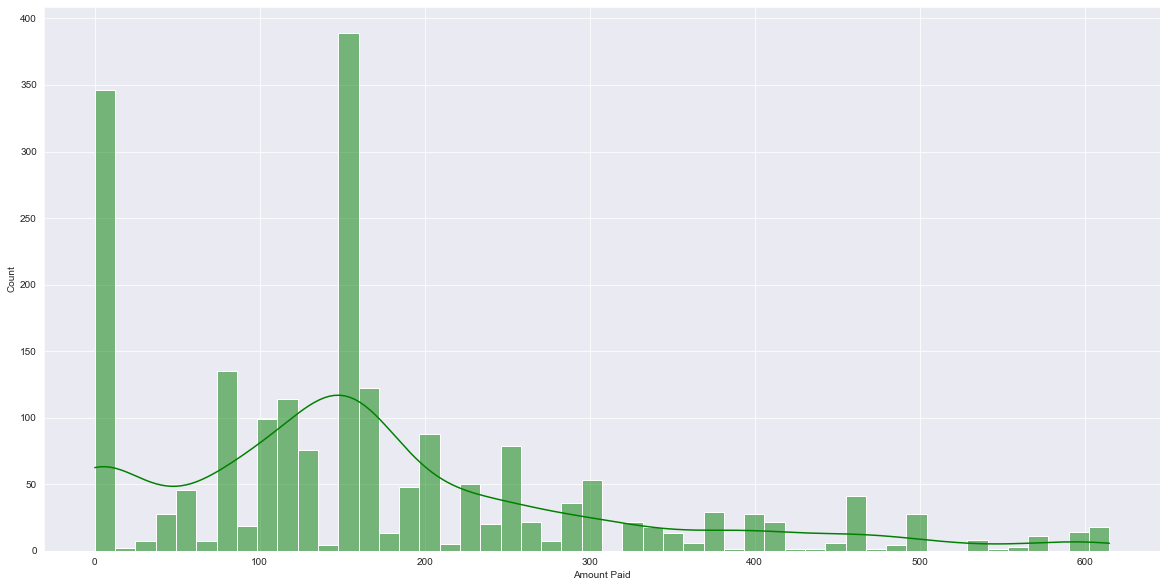

In [105]:
fig = plt.figure(figsize=(20, 10))
#sns.color_palette("bright")
sns.set_palette("Paired")
sns.histplot(df['Amount Paid'], kde=True, color='green', bins=50)
plt.show()


## Comparative target feature "Amount Paid" vs Normal theoretical distribution<a name="StaV"></a>


[]

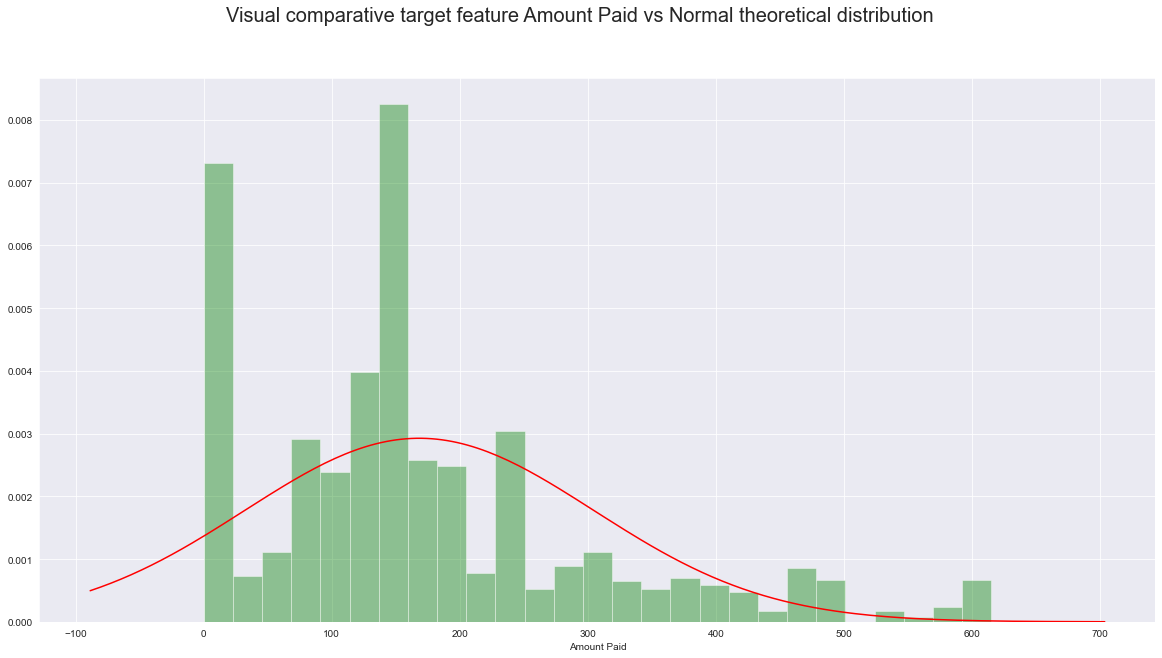

In [106]:
fig = plt.figure(figsize=(20, 10))
# Normal distribution with sample size 2091


fig.suptitle('Visual comparative target feature Amount Paid vs Normal theoretical distribution', fontsize=20)
ax = sns.distplot(df['Amount Paid'],fit=norm, kde=False, hist=True, color='g', fit_kws={"color":"red"})
ax.plot()


Normality is an assumption for some of the Machine Learning models, especially in regression. However, it is not mandatory that data should always follow normality.

Here we can clearly see that target feature "Amount Paid" has a moderate skewness.

Techniques like standardizing and ensemble methods can help to obtain a model that could generate good results.


## How Normal is our target feature "Amount Paid"
Applying Q-Q plot allows us to verify visually how the feature distribution "Amount Paid" differs from the theoretical normal distribution.

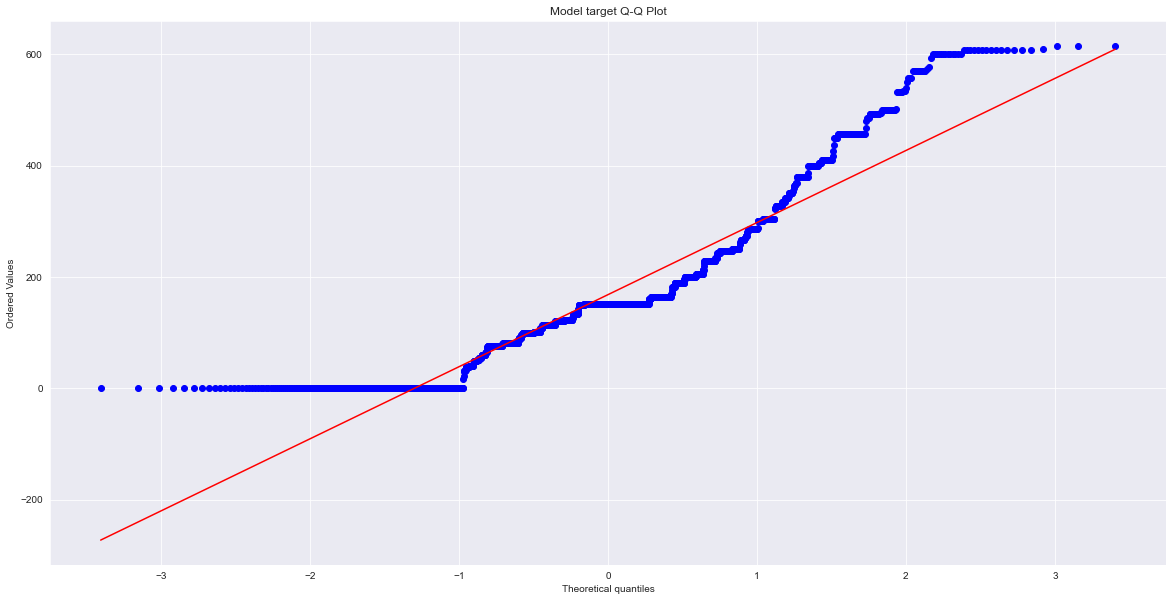

In [107]:
fig = plt.figure(figsize=(20, 10))
#Running plot & giving it a title
sns.set_palette("Paired")
stats.probplot(df['Amount Paid'], dist="norm", plot= plt)
plt.title("Model target Q-Q Plot")
plt.show()


## Test Normality: Kolmogorov-Smirnov test for goodness of fit<a name="nks"></a>

The Kolmogorov-Smirnov test is especially popular for large datasets under the hypothesis that the distribution is Normal. 

Our Null hypothesis: the target features 'Amount Paid' is normally distributed. 

If p> 0.05, normality can be assumed.

We can assume that data is not normally distributed,
#### p = 0.0 so the null hypothesis can be rejected at the 95% level of significance so we have enough evidence to assume that the distribution of target features 'Amount Paid' is not normal.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html


   K-S test:   KstestResult(statistic=0.8345289335246293, pvalue=0.0)


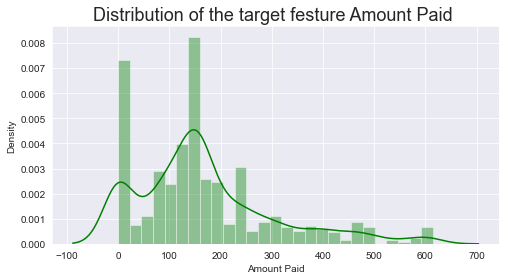

In [108]:
# Performing the test 

ks_test = stats.kstest(df['Amount Paid'], 'norm', alternative='two-sided')

print('\n   K-S test:  ', ks_test)


# Plotting the target festure distribution
plt.subplots(figsize=(8, 4))
sns.color_palette("bright")
plt.title('Distribution of the target festure Amount Paid ', fontsize=18)
sns.distplot(df['Amount Paid'], color='green')
plt.show()  
    

#### Conclusion:

#### Despite the skewness shown in the last statistic, based on the sample size of the data and the Central Limit Theorem, it is possible to apply to regression models under the assumption that the Normality is still valid.

In fact the regression models, in general, does not have assumptions about the distribution of the features only about the error which is measured by the residuals.



## Statistics data related with discrete features 'No of Spaces' and 'No days suspended'<a name="StaVIII"></a>



In [109]:
df[['No of Spaces','No days suspended']].describe().T

,count,mean,std,min,25%,50%,75%,max
No of Spaces,2091.0,4.699187,2.227040,1.0,3.0,4.0,6.0,10.0
No days suspended,2091.0,1.192253,0.511455,1.0,1.0,1.0,1.0,3.0


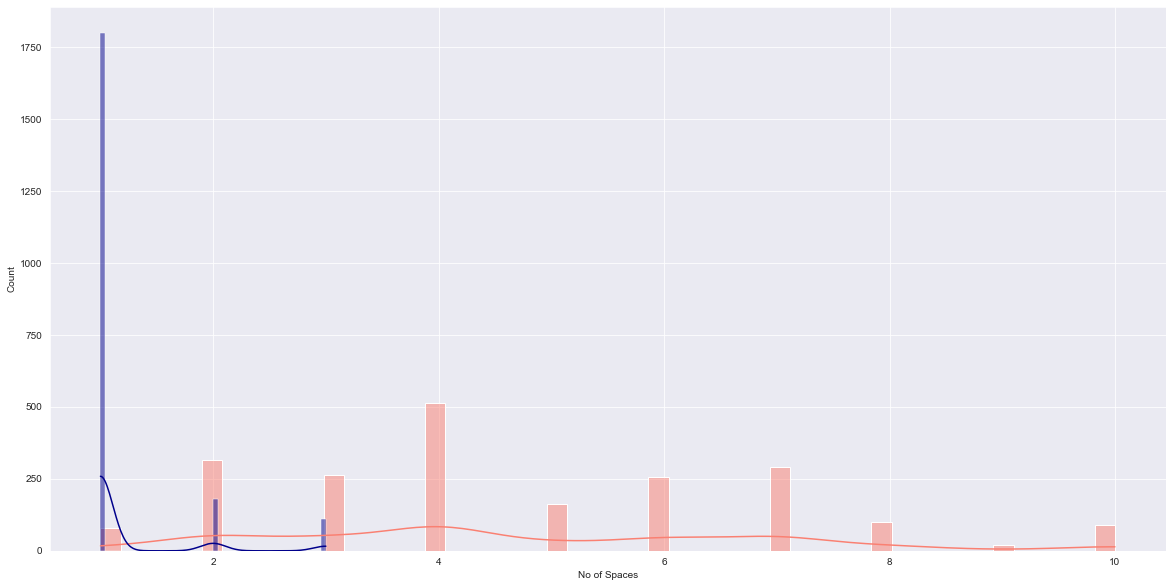

In [110]:
fig = plt.figure(figsize=(20, 10))
sns.histplot(df['No of Spaces'], kde=True, color='salmon', bins=50)
sns.histplot(df['No days suspended'], kde=True, color='darkblue', bins=50)
plt.show()


## Feature of Numbers of spaces (Poisson Distribution)<a name="Stap"></a>
### Also apply to feature of No days suspended (Poisson Distribution)<a name="StaVX"></a>

### If we need to know the numbers of spaces for the period then ...

We can descriptive with more details these independent features that perhaps they can approximatly well with Poisson distribution in which we calculate the probalitity the most common No of space suspended per day acording to the data.

N. Weiss Introdution STATISTICS (p 273-280). Pearson. 2017

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [111]:
## We can expect less that 6 No Spaces in the about 75% of requets

#calculate Q3
q3 = df['No of Spaces'].quantile(0.75)

print ('\n  Q3 of the feature No Spaces: ', q3)

#calculate probability

# Calculate probability of having 6 parking spaces suspended
k = 6
lambdaNoSpaces = df['No of Spaces'].mean()



print("\n  Poisson:: Probability of having 6 parking spaces suspended ")
print('\n  Probability of exactly: ',np.round(poisson.pmf(k = k, mu = lambdaNoSpaces), 3))
print('\n  Spaces suspended less or equal than: ', k,' probability: ', np.round(poisson.cdf(k=k, mu=lambdaNoSpaces), 3))

no = np.arange(0, step=1, stop=k+1 ) # number spaces
pmf = poisson.pmf(k = no, mu = lambdaNoSpaces) # probability according Poisson
cdf = poisson.cdf(k = no, mu = lambdaNoSpaces) # cumulative probability




  Q3 of the feature No Spaces:  6.0

  Poisson:: Probability of having 6 parking spaces suspended 

  Probability of exactly:  0.136

  Spaces suspended less or equal than:  6  probability:  0.805


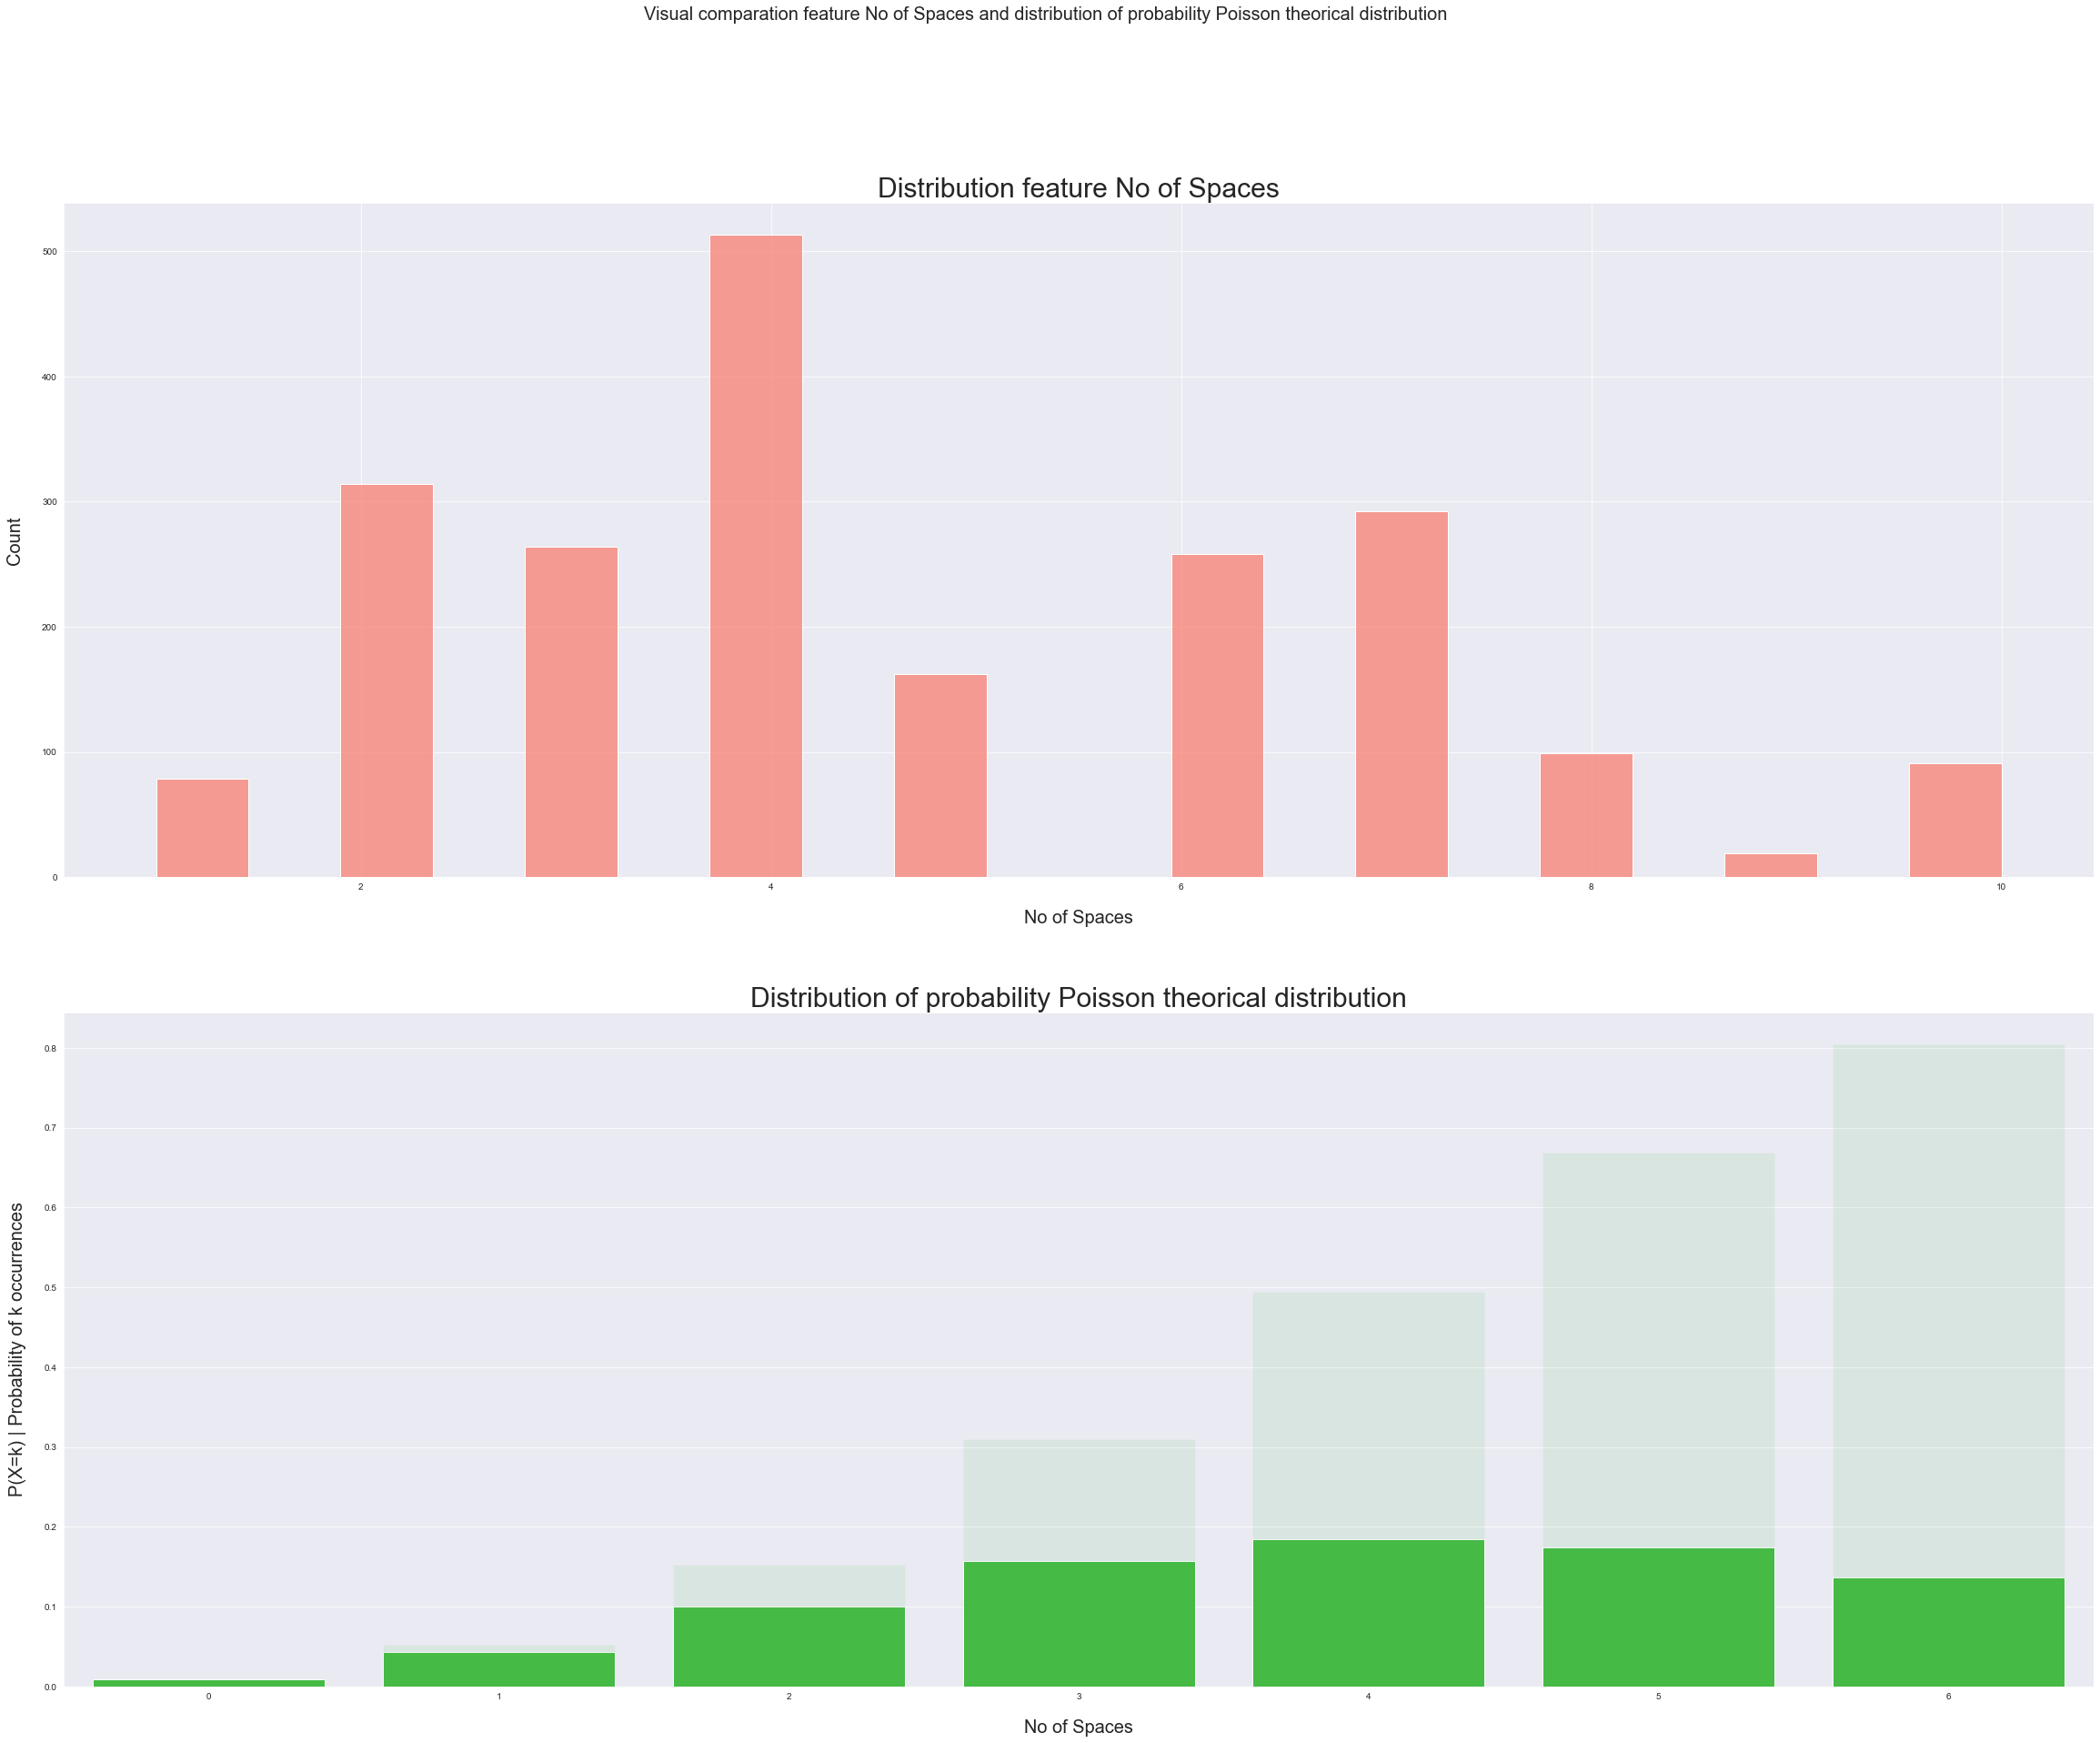

In [112]:


# Generate Poisson distribution with sample size 2091
# Distribution of probability Poisson theorical distribution



#create plot of Poisson distribution


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(40, 30)) 
fig.suptitle('Visual comparation feature No of Spaces and distribution of probability Poisson theorical distribution', fontsize=20)

sns.histplot(df['No of Spaces'], ax=ax1, color='salmon' )
ax1.set_xlabel('No of Spaces', fontsize=20, labelpad=20)
ax1.set_ylabel('Count', fontsize=20, labelpad=20)
ax1.set_title('Distribution feature No of Spaces', fontsize=30)

sns.barplot(no, pmf, color='limegreen', ax=ax2)
sns.barplot(no, cdf, color='limegreen', ax=ax2, alpha=0.1)

ax2.set_xlabel('No of Spaces', fontsize=20, labelpad=20)
ax2.set_ylabel('P(X=k) | Probability of k occurrences', fontsize=20, labelpad=20)
ax2.set_title('Distribution of probability Poisson theorical distribution', fontsize=30)

plt.show()


# Analyses statistics cumulate<a name="Ana"></a>


## Statistics data for month-year of the target feature: 'Amount Paid'<a name="AnaI"></a>

In [113]:
df[['Amount Paid','year','month']].T

,0,1,2,3,4,5,6,7,8,9,...,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091
Amount Paid,152.0,114.0,152.0,152.0,152.0,60.8,456.0,200.0,0.0,0.0,...,0.0,41.0,246.0,82.0,246.0,82.0,246.0,82.0,114.0,200.0
year,2006.0,2006.0,2006.0,2006.0,2006.0,2006.0,2006.0,2006.0,2006.0,2006.0,...,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0
month,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


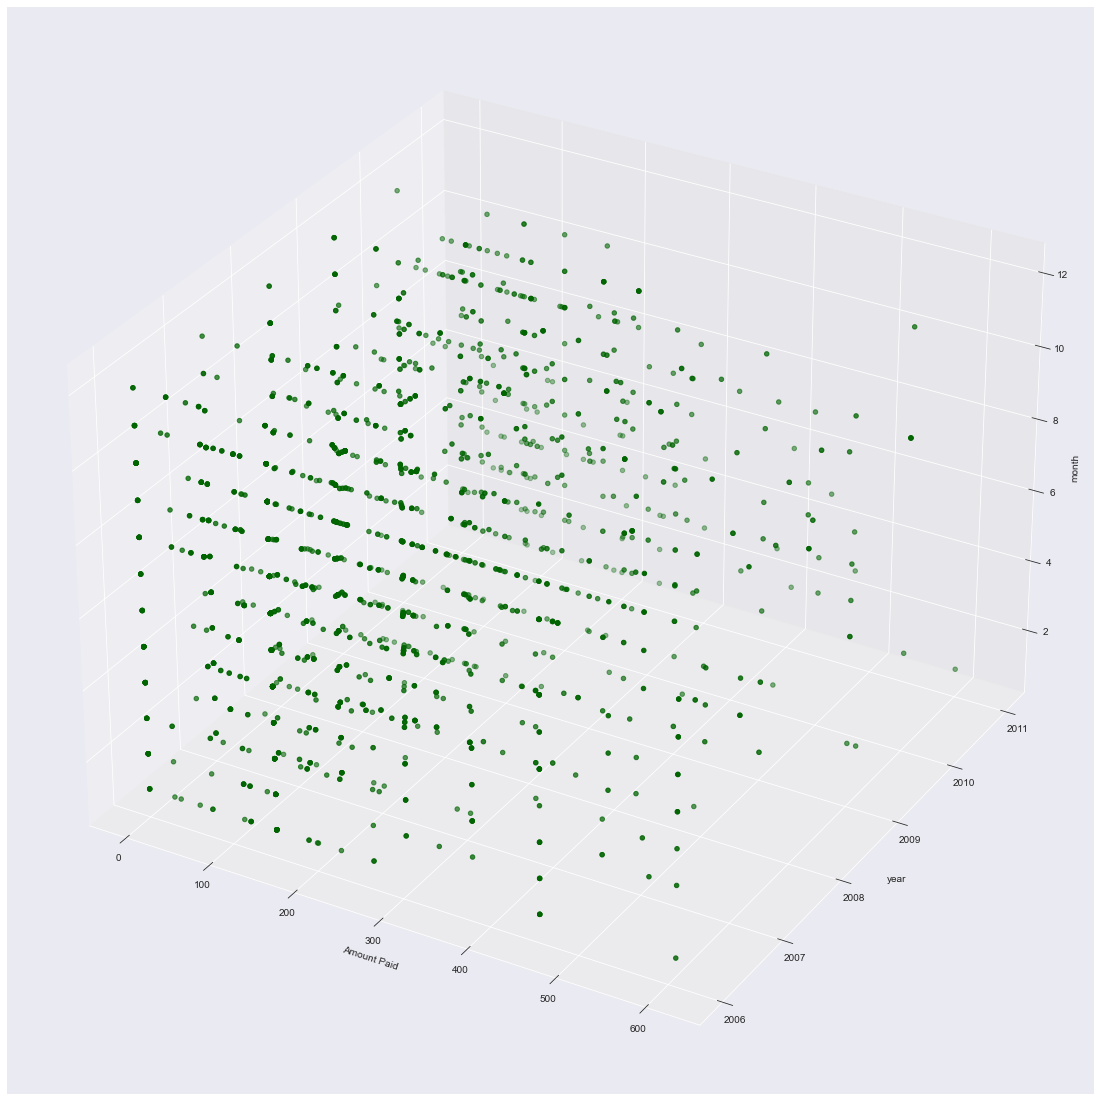

In [114]:
fig=plt.figure(figsize=(40, 20))
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(df["Amount Paid"],df["year"],df["month"],color="darkgreen")
ax.set_xlabel("Amount Paid")
ax.set_ylabel("year")
ax.set_zlabel("month")
plt.show()


## Group the data per months<a name="AnaII"></a>

In [115]:
dfperMonth = df.groupby(['year','month','Purpose','Location of Spaces','No of Spaces','No days suspended'])['Amount Paid'].sum().T

In [116]:
dfperMonth = dfperMonth.to_frame()

In [117]:
dfperMonth.index
dfperMonth.reset_index(inplace=True)
dfperMonth

,year,month,Purpose,Location of Spaces,No of Spaces,No days suspended,Amount Paid
0,2006,1,Access to Site,160 Shelbourne Road,5.0,1,152.0
1,2006,1,Collection from KPMG,St Stephens Green,3.0,1,114.0
2,2006,1,Compound Area to store spoil,Parnell Square North,5.0,1,152.0
3,2006,1,Daffodil Day,"St. Stephens Green, outside Rubicon Gallery & ...",2.0,1,76.0
4,2006,1,Filming,Lower Mount Street,7.0,1,532.0
...,...,...,...,...,...,...,...
1894,2011,6,Rugby fanzone,Merrion Road,6.0,1,1230.0
1895,2011,6,Shopfitters on Site at Sony Centre,Marlborough Street,1.0,1,200.0
1896,2011,6,Temporary loading bay,Ballsbridge Avenue,2.0,1,410.0
1897,2011,6,filming,Windmill Lane,5.0,1,205.0


In [118]:
dfperMonth.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1899.0,2007.778831,1.560023,2006.0,2006.0,2008.0,2009.0,2011.0
month,1899.0,6.369668,3.232841,1.0,4.0,6.0,9.0,12.0
No of Spaces,1899.0,4.768299,2.247121,1.0,3.0,4.0,6.0,10.0
No days suspended,1899.0,1.193260,0.505019,1.0,1.0,1.0,1.0,3.0
Amount Paid,1899.0,185.348036,176.567924,0.0,80.0,152.0,246.0,2052.0


In [119]:
# skew() and Kurt() functions from the SciPy Stata library
#calculate skewness
print('\n  Skewness of the target feature:  ', skew(dfperMonth['Amount Paid'], bias=False))
print('\n  mean:  ', dfperMonth['Amount Paid'].mean())
print('\n  median:  ', dfperMonth['Amount Paid'].median())


#calculate kurtosis
print('\n  Kurtosis of the target feature:  ', kurtosis(dfperMonth['Amount Paid'], bias=False))


  Skewness of the target feature:   2.5573837162958797

  mean:   185.34803580832013

  median:   152.0

  Kurtosis of the target feature:   13.869007350467967



## Group data per month by target feature: 'Amount Paid'<a name="AnaIII"></a>

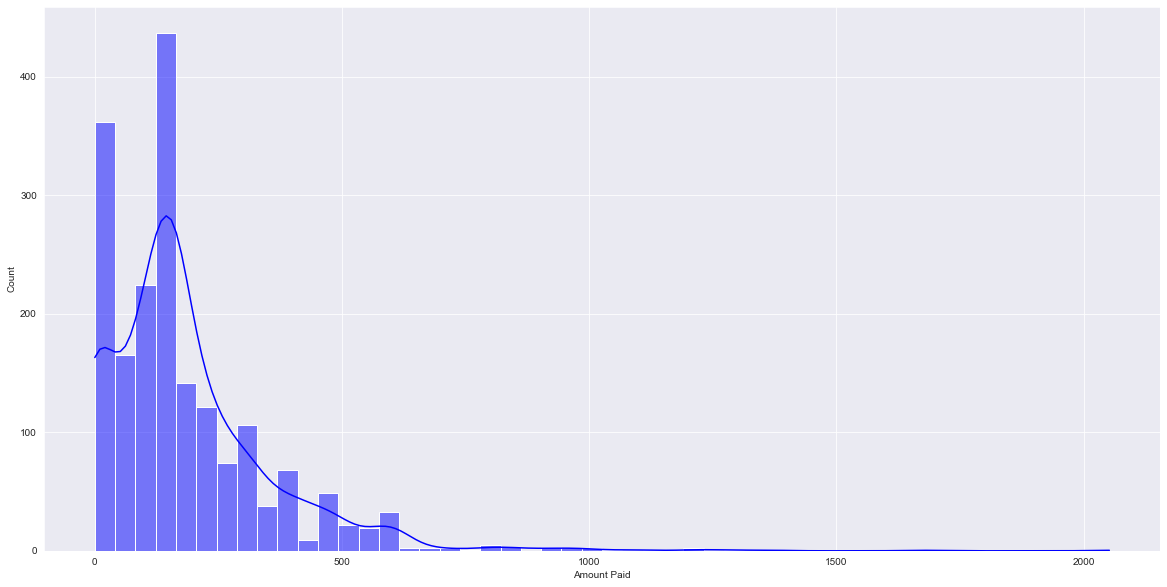

In [120]:
fig = plt.figure(figsize=(20, 10))
sns.histplot(dfperMonth['Amount Paid'], kde=True, color='blue', bins=50)
plt.show()

<Figure size 2880x1440 with 0 Axes>

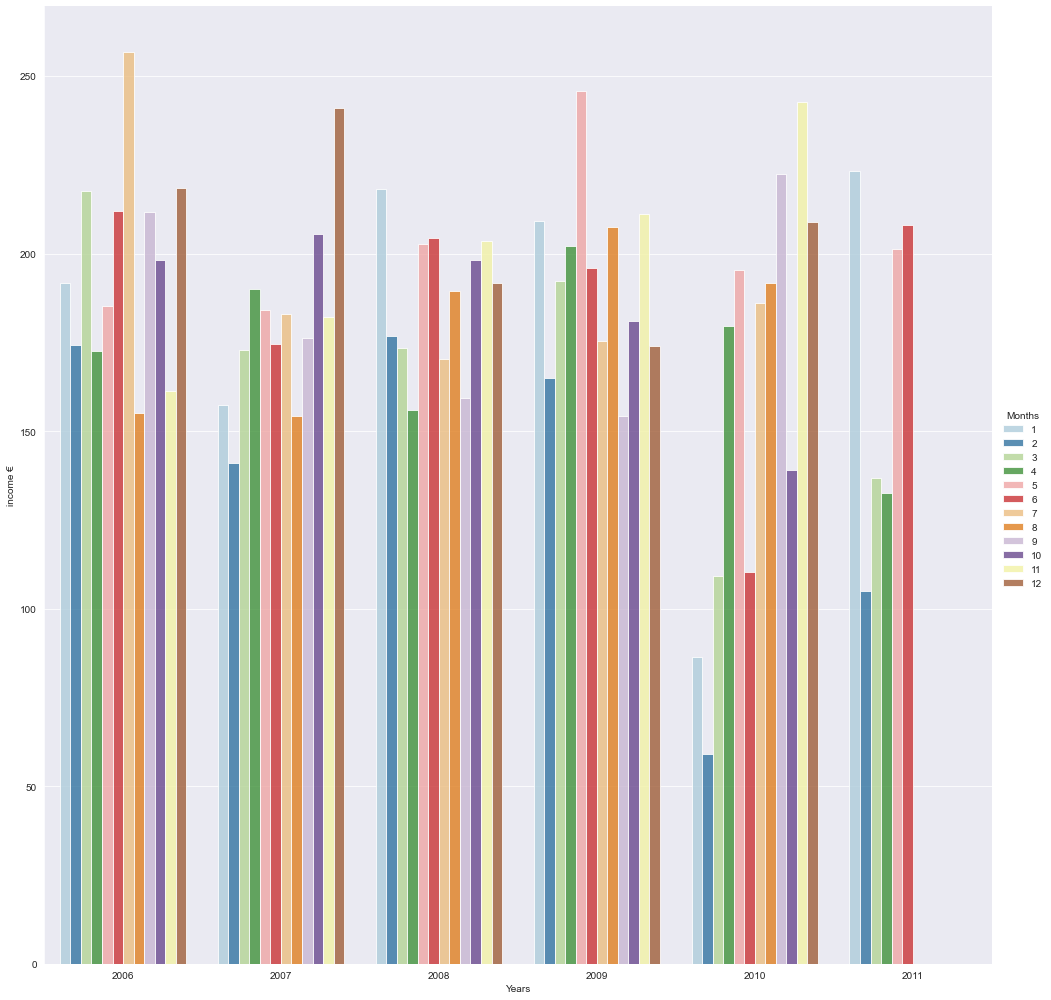

In [121]:
fig = plt.figure(figsize=(40, 20))
ax = sns.catplot(
    data=dfperMonth, kind="bar",
    x="year", y="Amount Paid", hue="month", ci=None, 
    palette="Paired", alpha=.8, height=14)
ax.despine(left=False)
ax.set_axis_labels("Years", "income €")
ax.legend.set_title("Months")
plt.show()

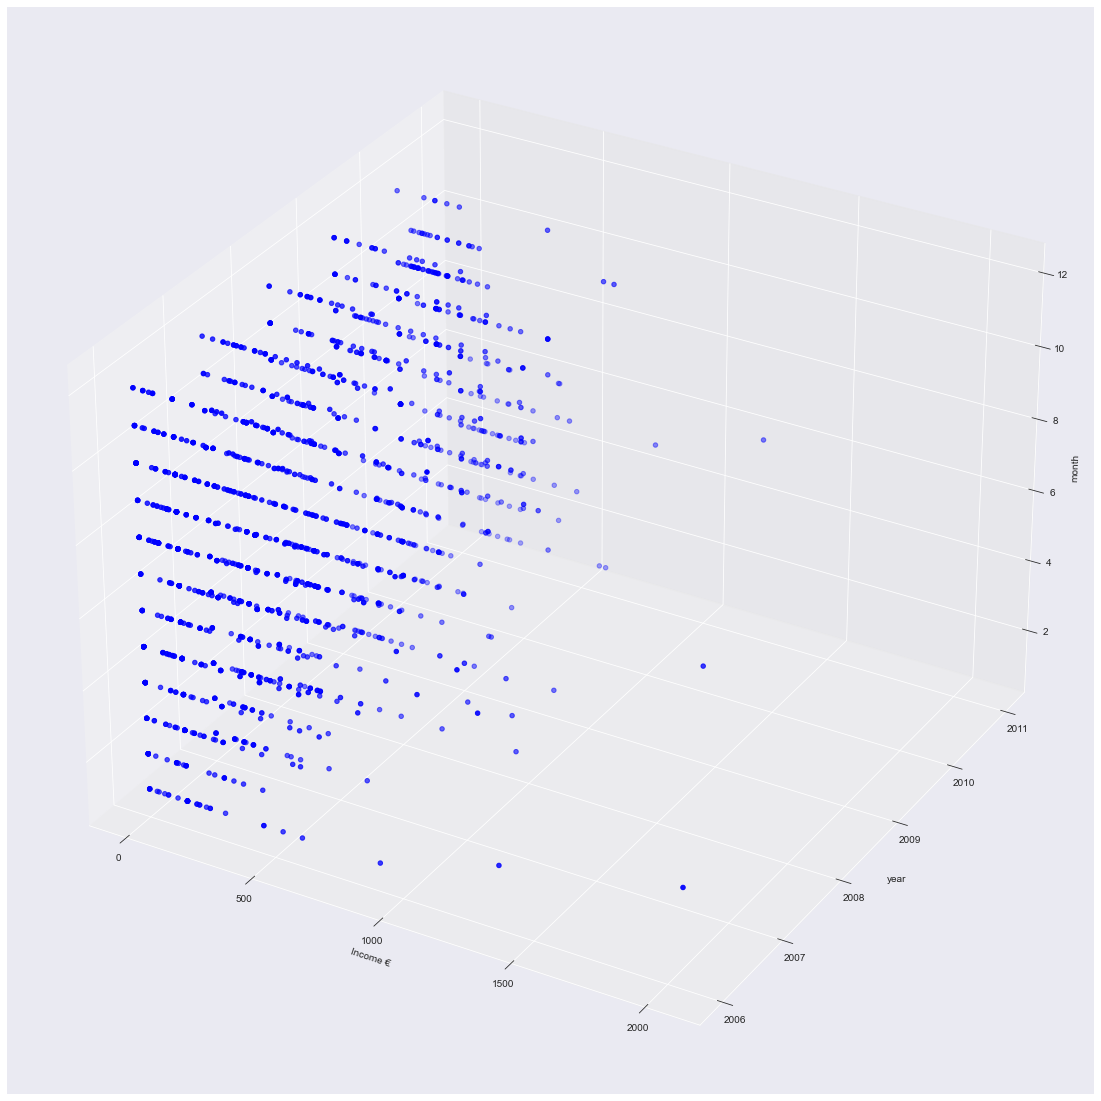

In [122]:
fig=plt.figure(figsize=(40, 20))
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(dfperMonth["Amount Paid"],dfperMonth["year"],dfperMonth["month"],color="blue")
ax.set_xlabel("Income €")
ax.set_ylabel("year")
ax.set_zlabel("month")
plt.show()


## Group the data per year<a name="AnaIV"></a>¶

In [123]:
dfperYear = df.groupby(['year','Purpose','Location of Spaces','No of Spaces','No days suspended'])['Amount Paid'].sum().T

In [124]:
dfperYear = dfperYear.to_frame()

In [125]:
dfperYear.index
dfperYear.reset_index(inplace=True)
dfperYear

,year,Purpose,Location of Spaces,No of Spaces,No days suspended,Amount Paid
0,2006,Parking of Filiming Vehicles,Inchiciore Road,10.0,1,190.0
1,2006,(outside Paddy Cullens),Merrion Road,4.0,1,152.0
2,2006,Access to Site,160 Shelbourne Road,4.0,1,152.0
3,2006,Access to Site,160 Shelbourne Road,5.0,1,152.0
4,2006,Access to Site,Fitzwilliam Street,4.0,1,304.0
...,...,...,...,...,...,...
1786,2011,parking generator for event in building,North Wall Quay (outside old Tile Style building),6.0,1,405.0
1787,2011,parking generator for event in building nearby,North Wall Quay (outside old Tile Style building),6.0,1,405.0
1788,2011,temporary loading bay,Ballsbridge Avenue,2.0,1,164.0
1789,2011,to position 2FM roadcaster to promote Irish He...,St. Stephens Green North,3.0,1,0.0


<Figure size 576x360 with 0 Axes>

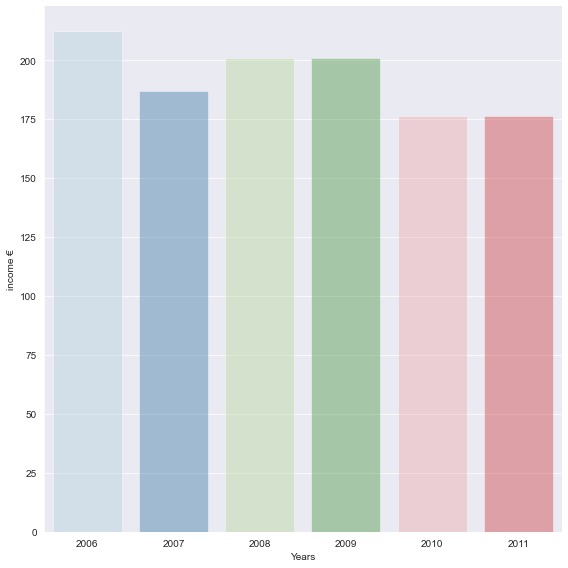

In [126]:
fig = plt.figure(figsize=(8, 5))
ax = sns.catplot(
    data=dfperYear, kind="bar",
    x="year", y="Amount Paid", ci=None,  
    palette="Paired", alpha=.4, height=8)
ax.despine(left=False)
ax.set_axis_labels("Years", "income €")
#ax.legend.set_title("Months")
plt.show()


# Multicollinearity<a name="mu"></a>


## Correlation between numerical variables and also with target features<a name="muI"></a>

### The variables (predictors) look like not correlation between then but few correlation with the target feature ''Amount Paid''

### https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

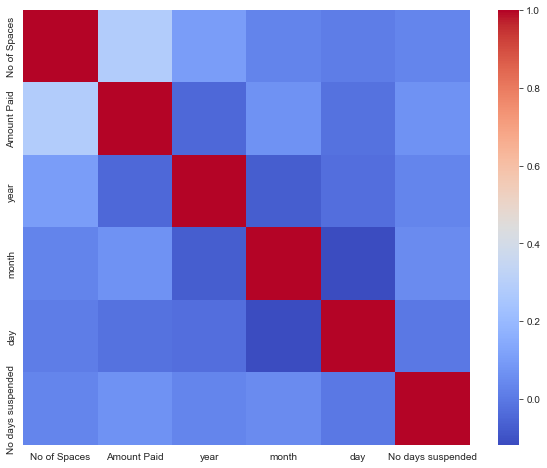

In [127]:
# correlation with the target features 'Amount Paid'
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm') # numerical variables 
plt.show()

### The regression models have an assumption that the predictors used in the regression are not correlated with each other.

In [128]:

corr = df[['No of Spaces', 'No days suspended']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

Pearson correlation coefficient matrix of each variables:
                    No of Spaces  No days suspended
No of Spaces           1.000000           0.032734
No days suspended      0.032734           1.000000



## Correlation between categorical variables: Purpose vs Location of Spaces<a name="muII"></a>

### https://pypi.org/project/pycorr/

In [129]:
# pip install pycorr
from pycorrcat.pycorrcat import plot_corr, corr_matrix

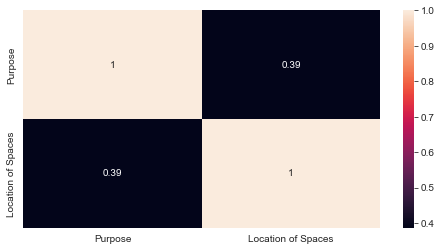

In [130]:
fig = plt.figure(figsize=(8, 4))
correlation_matrix = corr_matrix(df, ['Purpose', 'Location of Spaces'])
plot_corr(df, ['Purpose','Location of Spaces'] )
plt.show()

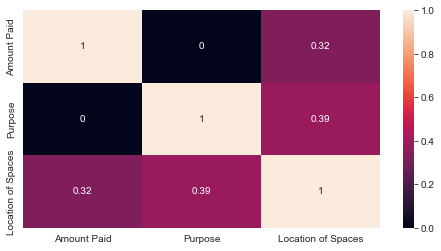

In [131]:
fig = plt.figure(figsize=(8, 4))
correlation_matrix = corr_matrix(df, ['Amount Paid','Purpose', 'Location of Spaces'])
plot_corr(df, ['Amount Paid','Purpose','Location of Spaces'] )
plt.show()


## Overall multicollinearity (correlation between all features) and the target features: 'Amount Paid'<a name="muIII"></a>

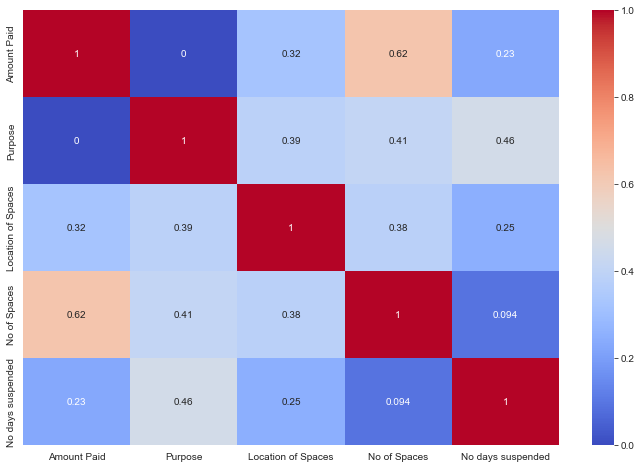

In [132]:
fig = plt.figure(figsize=(12, 8))
correlation_matrix = corr_matrix(df, ['Amount Paid','Purpose', 'Location of Spaces',
                                     'No of Spaces', 'No days suspended'])

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()

# Clustering

### The data need to be categorized or better, it will be clustered the data


Basically, there are 2 methods to simplify the data in order to make analysis easier:

- Dimensionality reduction (reduce the number of features)

- Clustering (reduce the data grouping by similarity)

For each of these methods, there are also basically two various algorithms that we can apply:

- Dimensionality reduction using Principal Component Analysis

- Clustering using K-means (kmodes) and similar clustering

In this case, the features 'Purpose' and 'Location of Spaces', our categorical variables, have a big cardinality therefore clustering will be chosen that a better solution to reduce the data.


In [133]:
# review data with NaN 
df.isnull().sum()

Location of Spaces    0
No of Spaces          0
Purpose               0
Amount Paid           0
year                  0
month                 0
day                   0
No days suspended     0
dtype: int64


# Clustering<a name="cl"></a>


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2091
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location of Spaces  2091 non-null   object 
 1   No of Spaces        2091 non-null   float64
 2   Purpose             2091 non-null   object 
 3   Amount Paid         2091 non-null   float64
 4   year                2091 non-null   int64  
 5   month               2091 non-null   int64  
 6   day                 2091 non-null   int64  
 7   No days suspended   2091 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 211.6+ KB



## Elbow curve to find optimal K

### KModes is method useful for categorical variables instead to calculate the average distances (Kmeans) to the centroid, calcule the "dissimilarities" between the clusters.

Cost is the sum of all the dissimilarities between the clusters, and plot cost for each k value.

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

 https://pypi.org/project/kmodes/



In [135]:

# -----------------------------
# Elbow curve to find optimal K
# -----------------------------
# KModes is method useful for categorical variables instead to calculate the average distances to the centroid 
# (it is not numerical variables), calcule the "dissimilarities" between the clusters.

# https://en.wikipedia.org/wiki/Elbow_method_(clustering)
'''
cost = []
K = range(1,25)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init='Huang', n_init = 5, verbose=1, random_state=61)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

plt.figure(figsize=(12,6))    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()
'''
df.info()
# KModes clustering

# KModes clustering is one of the unsupervised Machine Learning algorithms that is used to cluster categorical variables.

# KModes uses dissimilarities (total mismatches) between the data points. 
# The lesser the dissimilarities the more similar our data points are. It uses modes instead of means.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2091
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location of Spaces  2091 non-null   object 
 1   No of Spaces        2091 non-null   float64
 2   Purpose             2091 non-null   object 
 3   Amount Paid         2091 non-null   float64
 4   year                2091 non-null   int64  
 5   month               2091 non-null   int64  
 6   day                 2091 non-null   int64  
 7   No days suspended   2091 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 211.6+ KB


### According to the previous result, it will be chosen 9 clusters

In [136]:
df_original = df.copy()
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2091
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location of Spaces  2091 non-null   object 
 1   No of Spaces        2091 non-null   float64
 2   Purpose             2091 non-null   object 
 3   Amount Paid         2091 non-null   float64
 4   year                2091 non-null   int64  
 5   month               2091 non-null   int64  
 6   day                 2091 non-null   int64  
 7   No days suspended   2091 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 211.6+ KB


In [137]:

# Building the model with 9, 13,19 clusters
# https://pypi.org/project/kmodes/

kmode = KModes(n_clusters=9, init='Huang', n_init = 3, verbose=1, random_state=61) 
clusters = kmode.fit_predict(df)
# Print the cluster centroids
print(kmode.cluster_centroids_)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 391, cost: 10679.0
Run 1, iteration: 2/100, moves: 7, cost: 10679.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 242, cost: 10571.0
Run 2, iteration: 2/100, moves: 230, cost: 10505.0
Run 2, iteration: 3/100, moves: 23, cost: 10505.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 582, cost: 10332.0
Run 3, iteration: 2/100, moves: 71, cost: 10332.0
Best run was number 3
[['Temple Street' '7.0' 'Filming' '152.0' '2006' '7' '10' '1']
 ['Townsend Street' '2.0' 'Filming' '0.0' '2006' '3' '9' '1']
 ['Merrion Road (Outside Paddy Cullens)' '4.0' 'FM104 Roadhog' '164.0'
  '2008' '6' '27' '1']
 ['Stephens Green' '4.0' 'Roadhog' '152.0' '2006' '8' '24' '1']
 ['Merrion Square East' '3.0' 'Outside Broadcast' '0.0' '2008' '4' '7'
  '1']
 ['Gloucester Street' '4

array([0, 0, 3, ..., 7, 2, 2], dtype=uint16)

## Insert the predicted cluster values in our original dataset.

In [138]:
# insert the predicted cluster values in our original dataset.
df.insert(0, "Cluster", clusters, True)

In [139]:
df.head()

,Cluster,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
0,0,Commons Street (IFSC),5.0,Parking Catering Vehicles,152.0,2006,1,20,1
1,0,St Stephens Green,3.0,Collection from KPMG,114.0,2006,1,18,1
2,3,Stephens Green,4.0,To facilate filiming,152.0,2006,1,5,1
3,3,Stephens Green (Loreto College),4.0,Road Caster,152.0,2006,1,5,1
4,0,Molesworth Street,7.0,To facilate Filiming,152.0,2006,1,5,1



# Statistical analysis of the Clusters<a name="cls"></a>

In [140]:
df['Cluster'].unique()

array([0, 3, 1, 5, 6, 4, 8, 2, 7], dtype=uint16)

## Income € by cluster

In [141]:
# income € by cluster

Cluster_paid = df.groupby('Cluster').agg({'Amount Paid':'sum'})
Cluster_paid

,Amount Paid
Cluster,
0,96391.02
1,42578.20
2,49187.00
3,34713.00
4,30802.60
5,19130.30
6,45533.20
7,12585.60
8,21055.00


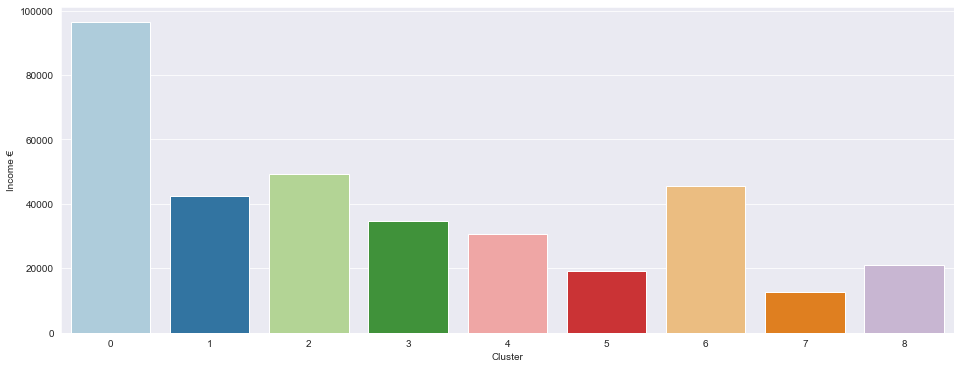

In [142]:
plt.figure(figsize=(16,6))
sns.barplot(Cluster_paid.index, Cluster_paid['Amount Paid'])
plt.ylabel("Income €")
plt.show()

In [143]:
Cluster_paid = df.groupby(['Cluster','year']).agg({'Amount Paid':'sum'})
Cluster_paid.reset_index(inplace=True)
Cluster_paid.set_index('Cluster', inplace=True, drop=True)
Cluster_paid.T

Cluster,0,0,0,0,0,0,1,1,1,1,...,7,7,7,7,8,8,8,8,8,8
year,2006.0,2007.0,2008.0,2009.00,2010.0,2011.0,2006.0,2007.0,2008.0,2009.0,...,2008.0,2009.0,2010.0,2011.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0
Amount Paid,45626.9,7230.4,7731.2,19089.72,14338.0,2374.8,21788.7,7294.4,3027.7,4963.0,...,8560.6,1166.0,1266.0,943.0,1102.0,2060.8,644.0,2699.0,13455.4,1093.8


## Plot Cluster income by year

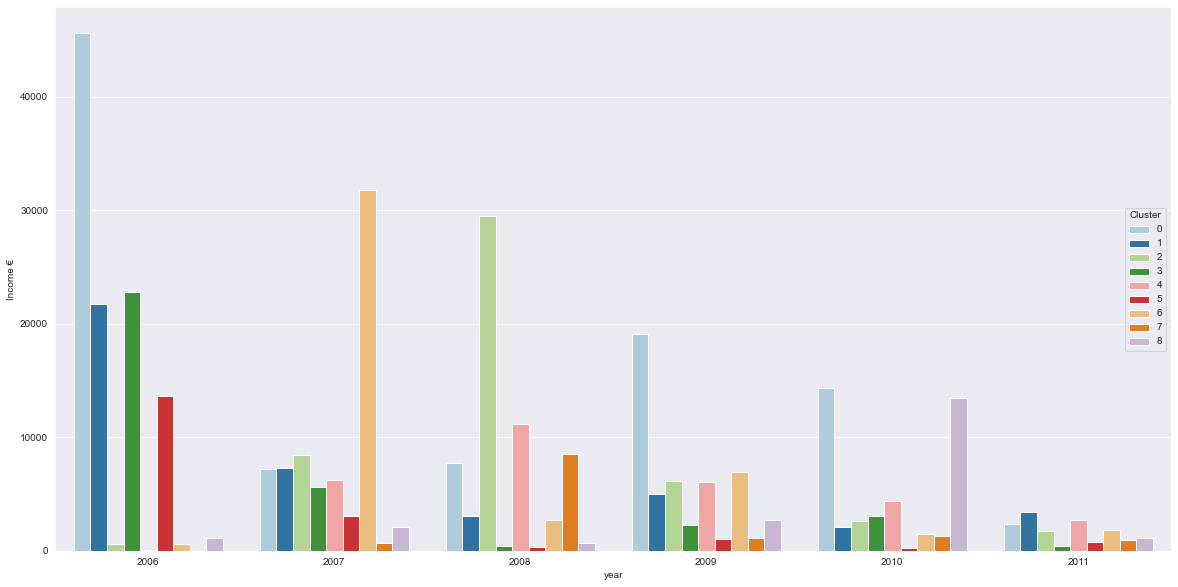

In [144]:
# plot Cluster income by year
plt.figure(figsize=(20,10))
ax=sns.barplot(Cluster_paid['year'], Cluster_paid['Amount Paid'], hue=Cluster_paid.index)
plt.ylabel("Income €")
sns.move_legend(ax, "center right")
plt.show()

In [145]:
Cluster_mostIncome = pd.DataFrame(Cluster_paid.groupby(['Cluster']).agg({'Amount Paid':'sum'}).sort_values(by=['Amount Paid'], ascending=False))
Cluster_mostIncome

,Amount Paid
Cluster,
0,96391.02
2,49187.00
6,45533.20
1,42578.20
3,34713.00
4,30802.60
8,21055.00
5,19130.30
7,12585.60


## Top 5 cluster with more income € to DCC

In [146]:
print('\n Top 5 values: \n')
Cluster_mostIncome.head()


 Top 5 values: 



,Amount Paid
Cluster,
0,96391.02
2,49187.00
6,45533.20
1,42578.20
3,34713.00


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2091
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cluster             2091 non-null   uint16 
 1   Location of Spaces  2091 non-null   object 
 2   No of Spaces        2091 non-null   float64
 3   Purpose             2091 non-null   object 
 4   Amount Paid         2091 non-null   float64
 5   year                2091 non-null   int64  
 6   month               2091 non-null   int64  
 7   day                 2091 non-null   int64  
 8   No days suspended   2091 non-null   int64  
dtypes: float64(2), int64(4), object(2), uint16(1)
memory usage: 215.6+ KB


## Analyses to describe the most popular "Purpose" and "Location" that requested suspended

In [148]:
# Purpose most popular in the most common clusters
print('\n Number of diference values: ', df['Purpose'].nunique())
print('\n Most frequency value (mode): % s ' % statistics.mode(df['Purpose']))
print('\n Top 10 values: \n')
pd.DataFrame(df['Purpose'].value_counts()).head(10)



 Number of diference values:  728

 Most frequency value (mode): Filming 

 Top 10 values: 



,Purpose
Filming,237
Outside Broadcast,108
Film Vehicles,92
Roadhog,60
Film Unit,55
Filiming Vehicles,47
FM104 Roadhog,42
Broadcast,37
To allow traffic to flow while loading,35
Blood Donation Clinic,33


In [149]:
# Purpose most popular in the most common clusters
print('\n Number of diference values: ', df['Location of Spaces'].nunique())
print('\n Most frequency value (mode): % s ' % statistics.mode(df['Location of Spaces']))
print('\n Top 10 values: \n')
pd.DataFrame(df['Location of Spaces'].value_counts()).head(10)



 Number of diference values:  862

 Most frequency value (mode): Townsend Street 

 Top 10 values: 



,Location of Spaces
Townsend Street,38
Gloucester Street,34
Temple Street,28
Clonmel Street,25
Fishamble Street,25
St. Stephens Green North,24
Eccles Street,22
Merrion Road,21
Hatch Street,21
Molesworth Street,19




# Multicollinearity with the feature "Cluster"<a name="mcl"></a>

Introduce cluster in the data based on the categorical variables 'Purpose' and 'Location of Spaces' allows clustering the data in groups reasonably more simple, however, introduces multicollinearity between the relation with cluster and the categorical features.

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2091
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cluster             2091 non-null   uint16 
 1   Location of Spaces  2091 non-null   object 
 2   No of Spaces        2091 non-null   float64
 3   Purpose             2091 non-null   object 
 4   Amount Paid         2091 non-null   float64
 5   year                2091 non-null   int64  
 6   month               2091 non-null   int64  
 7   day                 2091 non-null   int64  
 8   No days suspended   2091 non-null   int64  
dtypes: float64(2), int64(4), object(2), uint16(1)
memory usage: 215.6+ KB


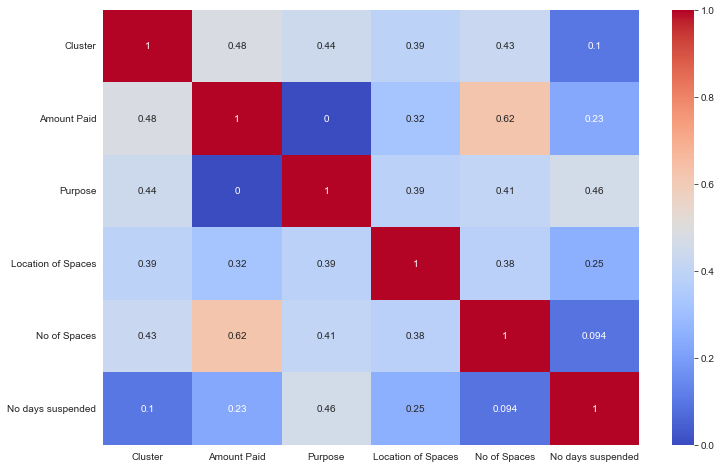

In [151]:
fig = plt.figure(figsize=(12, 8))
correlation_matrix = corr_matrix(df, ['Cluster','Amount Paid','Purpose', 'Location of Spaces',
                                     'No of Spaces', 'No days suspended'])

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()


# Strategic to modeling the data<a name="str"></a>


In order to analyse and chose the best regression model to predict the income € (target feature 'Amount Paid') is followed two techniques:

### Regression models:
    - Simples multilineal regression
    - Analyses the assumption for a regression model
    - Analyses the residual of the model
    - Extend to ElasticNet

  ElasticNet is a linear regression model trained with both L1 (Lasso)  and L2 (Ridge) regularization of the coefficients. 
  
  
Using these models could help to obtain good accuracy however usually introduce variance in the error (high variance typically means that it has overfitting to training data)  despite the fact that could reduce the bias. It is possible "tune" the models to reduce variance but producing on contrary effects, introducing bias. 
Therefore it is necessary to find some optimal point in order to obtain a bias-variance tradeoff.

The best solution to obtain a bias-variance tradeoff point using ensemble methods: bagging (Bootstrap Aggregating). 

In this case, Random forest models help to obtain a balance between bias and variance via tree depth and the number of trees, in the other hand, XGBoost, eXtended Gradient boosting models can reduce both bias and variance by boosting for many rounds (using low learning rate).

T.Hastie, R.Tibshirani, J.Friedman. “The Elements of Statistical Learning Data Mining, Inference, and Prediction”. ( p. 37-40, 219, 226, 597).  2017. Springer.


### Use ensemble method to improve performance and accuracy:

- Random Forests (RF is used extensively in the industry because provides good results for many problems)

- XGBoost (XGBoost is used extensively in Kaggle competitions)




https://scikit-learn.org/stable/modules/linear_model.html?highlight=regression#elastic-net

https://scikit-learn.org/stable/modules/ensemble.html?highlight=random+forest#forests-of-randomized-trees

https://xgboost.readthedocs.io/en/stable/get_started.html

# Create variables features and target: prepare data for regression

### Preparation data for regression in order to predict the income € according to the cluster

In [152]:
df_original = df.copy() # Modifications to the data or indices of the copy will not be reflected in the original object 


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2091
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cluster             2091 non-null   uint16 
 1   Location of Spaces  2091 non-null   object 
 2   No of Spaces        2091 non-null   float64
 3   Purpose             2091 non-null   object 
 4   Amount Paid         2091 non-null   float64
 5   year                2091 non-null   int64  
 6   month               2091 non-null   int64  
 7   day                 2091 non-null   int64  
 8   No days suspended   2091 non-null   int64  
dtypes: float64(2), int64(4), object(2), uint16(1)
memory usage: 215.6+ KB


In [154]:
features = df.copy()
features

,Cluster,Location of Spaces,No of Spaces,Purpose,Amount Paid,year,month,day,No days suspended
0,0,Commons Street (IFSC),5.0,Parking Catering Vehicles,152.0,2006,1,20,1
1,0,St Stephens Green,3.0,Collection from KPMG,114.0,2006,1,18,1
2,3,Stephens Green,4.0,To facilate filiming,152.0,2006,1,5,1
3,3,Stephens Green (Loreto College),4.0,Road Caster,152.0,2006,1,5,1
4,0,Molesworth Street,7.0,To facilate Filiming,152.0,2006,1,5,1
...,...,...,...,...,...,...,...,...,...
2087,7,Ballsbridge Avenue,2.0,Temporary loading bay,82.0,2011,6,14,1
2088,2,Merrion Road,6.0,Rugby fanzone,246.0,2011,6,14,1
2089,7,Ballsbridge Avenue,2.0,Temporary loading bay,82.0,2011,6,14,1
2090,2,Fairview Strand,6.0,Roadhog,114.0,2011,6,14,1


In [198]:


# Standardize features by removing the mean and scaling to unit variance.

# The standard score of a sample x is calculated as:
# z = (x - u) / s



# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
   

columns = ['Cluster','No of Spaces', 'year','month','No days suspended']
for col in columns:
    features[col]= scaler.fit_transform(features[[col]])    
    
features.head()

,Cluster,No of Spaces,year,month,day,No days suspended
0,0.000,0.444444,0.0,0.0,20,0.0
1,0.000,0.222222,0.0,0.0,18,0.0
2,0.375,0.333333,0.0,0.0,5,0.0
3,0.375,0.333333,0.0,0.0,5,0.0
4,0.000,0.666667,0.0,0.0,5,0.0


Introduce cluster in the data based on the categorical variables 'Purpose' and 'Location of Spaces' allows clustering the data in groups reasonably more simple, however, introduces multicollinearity between the relation with cluster and the categorical features.

#### Therefore, the categorical features will be excluded to avoid multicollinearity

In [156]:
features = features.drop(['Location of Spaces'], axis=1) # drop redundant feature 'Location of Spaces'
features = features.drop(['Purpose'], axis=1) # drop redundant feature 'Purpose'
features

,Cluster,No of Spaces,Amount Paid,year,month,day,No days suspended
0,0.000,0.444444,152.0,0.0,0.000000,20,0.0
1,0.000,0.222222,114.0,0.0,0.000000,18,0.0
2,0.375,0.333333,152.0,0.0,0.000000,5,0.0
3,0.375,0.333333,152.0,0.0,0.000000,5,0.0
4,0.000,0.666667,152.0,0.0,0.000000,5,0.0
...,...,...,...,...,...,...,...
2087,0.875,0.111111,82.0,1.0,0.454545,14,0.0
2088,0.250,0.555556,246.0,1.0,0.454545,14,0.0
2089,0.875,0.111111,82.0,1.0,0.454545,14,0.0
2090,0.250,0.555556,114.0,1.0,0.454545,14,0.0


In [157]:
# target variable means income €
target   = features['Amount Paid']  # target variable means income €
features = features.drop(['Amount Paid'], axis=1) # independent features 
target

0       152.0
1       114.0
2       152.0
3       152.0
4       152.0
        ...  
2087     82.0
2088    246.0
2089     82.0
2090    114.0
2091    200.0
Name: Amount Paid, Length: 2091, dtype: float64


# Regression models<a name="rg"></a>

## The Linear regression models in general have some general assumptions:

- Linearity of the data. The relationship between the predictor (x) and the outcome (y) is assumed to be linear
- Q-Q Plot. Normality of residuals. The residual errors are assumed to be normally distributed. 
- Homogeneity of residuals variance. The residuals are assumed to have a constant variance (homoscedasticity)
- Independence of residuals error terms. 

And also is usefull to check the multicollinearity of the features.

http://www.sthda.com/english/articles/39-regression-model-diagnostics/161-linear-regression-assumptions-and-diagnostics-in-r-essentials/#linearity-of-the-data

A. Kassambara, “Machine Learning Essentials: Practical Guide in R.”. (P. 44-56). 2017. STHDA.

In [158]:

# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size = 0.20, random_state = 61)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1672, 6) (419, 6)
(1672,) (419,)


In [159]:


# Fitting Multiple Linear Regression to the Training set

# OLS regression does not make assumptions about the distribution of the variables, 
# only about the error which is estimate by the residuals. 

# with statsmodels

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 
 
results_model = model.summary()
print(results_model)
print(model.resid)

print("For Test Data:  \n ")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2:  ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))


                                 OLS Regression Results                                
Dep. Variable:            Amount Paid   R-squared (uncentered):                   0.625
Model:                            OLS   Adj. R-squared (uncentered):              0.624
Method:                 Least Squares   F-statistic:                              463.2
Date:                Sat, 05 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:57:12   Log-Likelihood:                         -10511.
No. Observations:                1672   AIC:                                  2.103e+04
Df Residuals:                    1666   BIC:                                  2.107e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------


### r2 value indicates a low performance of 0.0945 (for test data) to the model to explain the target feature: Amount Paid. The result shows overfitting the model.

r2 with the training data is 0.496 notable difference from the result for test data means that the model is learning the detail and noise in the training data, overfitting.

The regression coefficient shows the relation between the features and the target, which means each percent of the feature, is increases (or decreases) the target feature Amount Paid. 

The std.error column displays the standard error of the estimate. 

The t-value column displays the test statistic(two-sided t-test). 

Our null hypothesis is there is no effect of the features in the target variable Amount Paid.

However, according to the t-test, Pr( > | t | ), the p-value > 0.05, therefore, it does not have enough evidence to reject the null hypothesis and looks like there is no influence of the features in the target variable Amount Paid. 

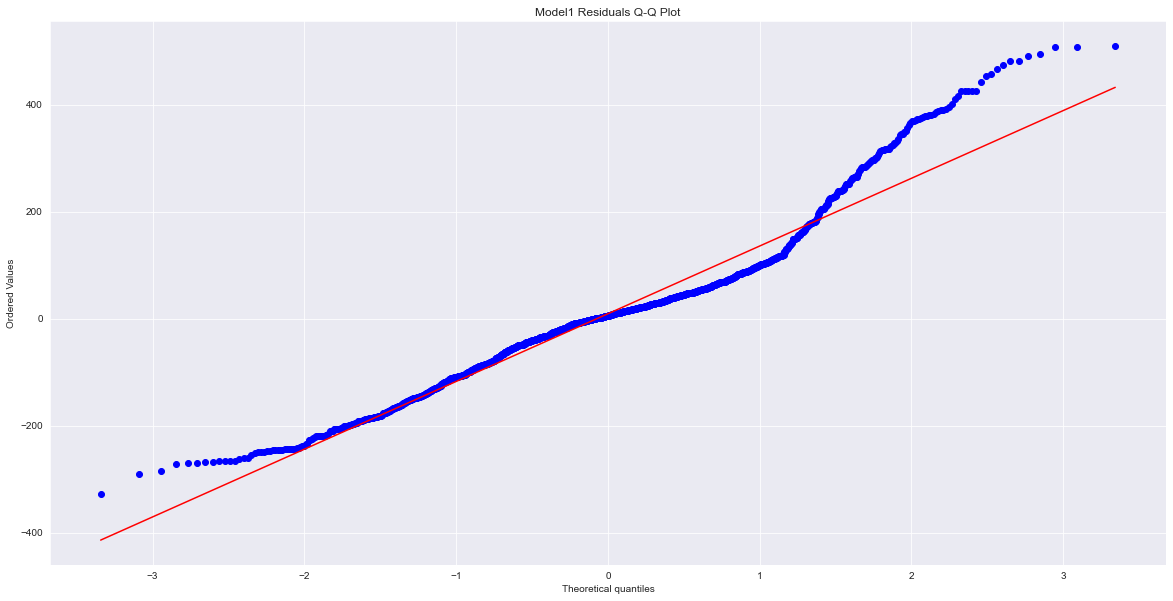

In [160]:
fig = plt.figure(figsize=(20, 10))
# Check normality of the residual
# Running plot & giving it a title
sns.set_palette("Paired")
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")
plt.show()

<Figure size 4320x2160 with 0 Axes>

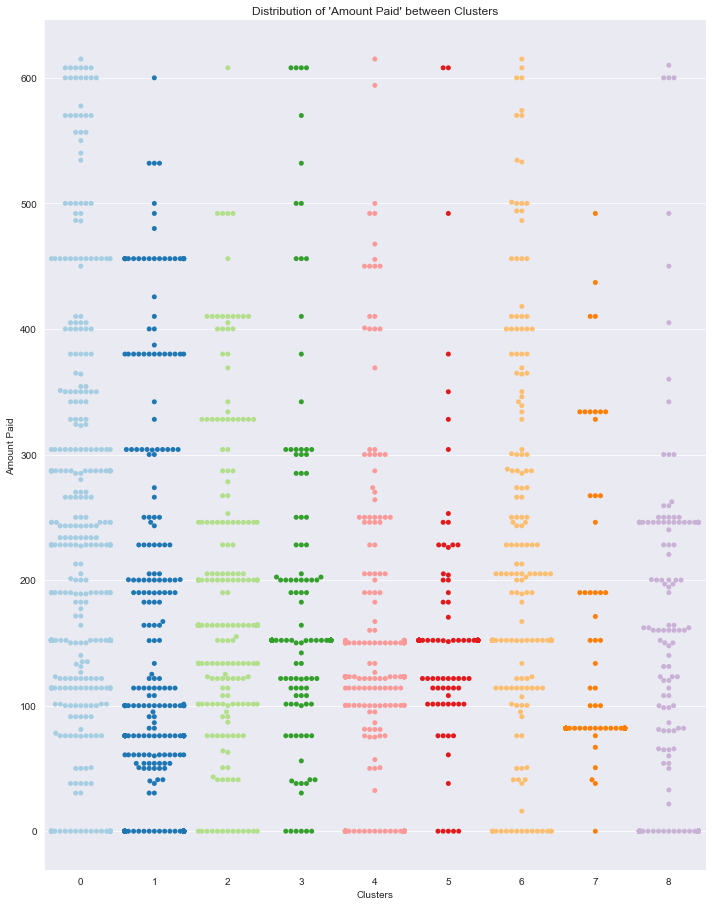

In [161]:
fig = plt.figure(figsize=(60, 30))
x=df['Cluster'].values
y=df['Amount Paid'].values

sns.catplot(x=x, y=y, 
            kind="swarm", data=df,  
            height=12.5, aspect=.8)

plt.xlabel("Clusters")
plt.ylabel("Amount Paid")

plt.title("Distribution of 'Amount Paid' between Clusters")

plt.show()

#### Relation between test data and difference with the predicted data.

Shows a strong relationship with low values of the amount paid but poor relation for higher values

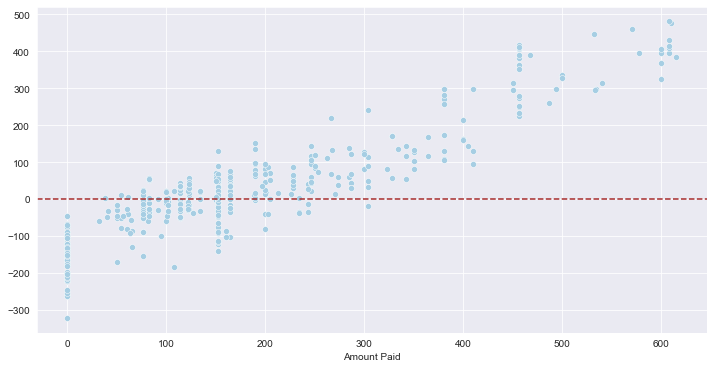

In [162]:

fig = plt.figure(figsize=(12, 6))

train_res = y_test - y_pred

sns.scatterplot(x=y_test,y=train_res)
plt.axhline(y=0, color='brown', linestyle='--')
plt.show()

In [163]:
# Fitting Multiple Linear Regression to the Training set

# with sklearn LinearRegression()

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

print('Score train data:  ', regressor.score(X_train, y_train))
print('Score test data:  ', regressor.score(X_test, y_test))
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

print("For Test Data:  \n ")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2:  ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

Score train data:   0.10691598619318576
Score test data:   0.09455872733241888
Intercept: 
 117.57840413983658
Coefficients: 
 [-45.6762047  156.87432383 -18.48136818  28.48544104  -0.51546541
  17.3669544 ]
For Test Data:  
 
MAE:  98.22515493514447
MSE:  19930.85788486636
r2:   0.09455872733241888
RMSE:  141.17669030284836


## Polynomial regression<a name="pr"></a>



In [164]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline

In [165]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1672, 6)
(1672,)
(419, 6)
(419,)


In [166]:
# fit multiple polynomial features
# Try for degrees 1,2,3 for Polynomial regression
degrees = [1,2,3]

y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # using the pipeline to assemble two steps and apply together
    modelPol = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    modelPol.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = modelPol.predict(X_train)
    y_test_pred[:, i] = modelPol.predict(X_test)

In [167]:
# compare r2 for train and test sets
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.11, test score=0.09
Polynomial degree 2: train score=0.14, test score=0.1
Polynomial degree 3: train score=0.22, test score=0.17


Applying Polynomial regression the result improves by 17% perhaps because the target feature and also the residuals of the models indicate that the data is non-normal distributed.



# Test Normality: Kolmogorov-Smirnov test for goodness of fit<a name="ks"></a>

The Kolmogorov-Smirnov test, especially popular for larga datasets under the hypothesis that the distribution is Normal. 

Our Null hypothesis: the residual is normally distributed. 

If p > 0.05, normality can be assumed.

In this case, we could assume that data is not normally distributed,
#### p = 0.0 so the null hypothesis can be rejected at the 95% level of significance.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html


   D Agostino K-squared Statistics=201.734, p=0.000

   K-S test:   KstestResult(statistic=0.5145589711408759, pvalue=0.0)


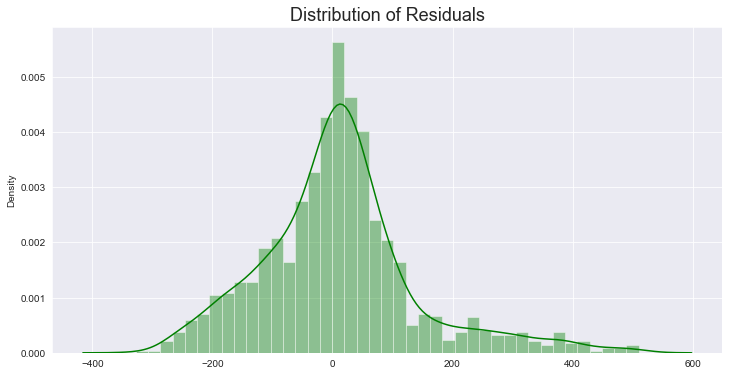

In [168]:
# Performing the test on the residuals


from scipy.stats import normaltest

# normality test
stat, p = normaltest(model.resid)
print('\n   D Agostino K-squared Statistics=%.3f, p=%.3f' % (stat, p))

ks_test = stats.kstest(model.resid, 'norm', alternative='two-sided')

print('\n   K-S test:  ', ks_test)

    
# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
sns.color_palette("bright")
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(model.resid, color='green')
plt.show()
 
# K-S test statistic is far from zero and p-value is 0 suggesting that 
# the residuals are not normally distributed  




## Test Normality: Jarque-Bera test<a name="jb"></a>

The Jarque-Bera test is usually used for large data sets, more than 2000, because it is reliable when the number of observations is large.


In [169]:
jarque_bera_test = stats.jarque_bera(model.resid)
jarque_bera_test

print('\n   Jarque-Bera test:  ', jarque_bera_test)
 
# p-values is 0 suggesting that the residuals are not normally distributed  


   Jarque-Bera test:   Jarque_beraResult(statistic=361.73662028591383, pvalue=0.0)



# Extend to ElasticNet: applying regularization<a name="enet"></a>

ElasticNet is a linear regression model trained with both L1 (Lasso) and L2 (Ridge) regularization of the coefficients.

The results show similar results for r2 in the train data and also test data than the previous regression model.

https://scikit-learn.org/stable/modules/linear_model.html?highlight=regression#elastic-net




In [170]:
# Verify data for regression
# regression for data in order to predict the income according to the cluster

In [171]:
features

,Cluster,No of Spaces,year,month,day,No days suspended
0,0.000,0.444444,0.0,0.000000,20,0.0
1,0.000,0.222222,0.0,0.000000,18,0.0
2,0.375,0.333333,0.0,0.000000,5,0.0
3,0.375,0.333333,0.0,0.000000,5,0.0
4,0.000,0.666667,0.0,0.000000,5,0.0
...,...,...,...,...,...,...
2087,0.875,0.111111,1.0,0.454545,14,0.0
2088,0.250,0.555556,1.0,0.454545,14,0.0
2089,0.875,0.111111,1.0,0.454545,14,0.0
2090,0.250,0.555556,1.0,0.454545,14,0.0


In [172]:
target

0       152.0
1       114.0
2       152.0
3       152.0
4       152.0
        ...  
2087     82.0
2088    246.0
2089     82.0
2090    114.0
2091    200.0
Name: Amount Paid, Length: 2091, dtype: float64

In [173]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1672, 6) (419, 6)
(1672,) (419,)


In [174]:
#regularization = ElasticNet(random_state=61)
from sklearn.linear_model import ElasticNetCV
regularization = ElasticNetCV(cv=10, random_state=61) # with cross-validation
regularization.fit(X_train, y_train)


ElasticNetCV(cv=10, random_state=61)

In [175]:
print('\n    Coefficients:   ', regularization.coef_)
print('\n    Intercept:  ', regularization.intercept_)


    Coefficients:    [-34.29011918  95.82660553 -11.14037921  20.67901036  -0.50772363
  12.64854751]

    Intercept:   139.90921543045312


In [176]:

# Predicting the Test set results
y_pred = regularization.predict(X_test)

print('Score train data:  ', regularization.score(X_train, y_train))
print('Score test data:  ', regularization.score(X_test, y_test))

print("\n  For Test Data:  \n ")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2:  ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

Score train data:   0.09259204705636037
Score test data:   0.07679338797225588

  For Test Data:  
 
MAE:  101.54956044055702
MSE:  20321.914118718676
r2:   0.07679338797225588
RMSE:  142.5549512248476



# Use ensemble method to improve performance and accuracy<a name="esn"></a>

- Random Forests (RF is used extensively in the industry because provides good results for many problems)

- XGBoost (XGBoost is used extensively in Kaggle competitions)


https://scikit-learn.org/stable/modules/ensemble.html?highlight=random+forest#forests-of-randomized-trees

https://xgboost.readthedocs.io/en/stable/get_started.html

In [177]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1672, 6) (419, 6)
(1672,) (419,)


In [178]:
models = []

In [179]:
models.append(('randomforest', RandomForestRegressor(n_estimators = 300, min_samples_split = 2, 
                                   min_samples_leaf= 1, max_features = 'sqrt', 
                                   max_depth= 10, bootstrap=True)))
models.append(('XGBoost', XGBRegressor(n_estimators=100, max_depth=4,reg_alpha=0.9)))


- Random Forests (RF is used extensively in the industry because provides good results for many problems)

- XGBoost (XGBoost is used extensively in Kaggle competitions)

In [180]:
models

[('randomforest',
  RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=300)),
 ('XGBoost',
  XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=4,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, reg_alpha=0.9, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None))]

Ensamble method

In [181]:
results = []
name_model = []
for name, model in models:
    # Conduct k-fold cross-validation
    print ("\n Model:  ", name)
    kfold = KFold(n_splits=10, shuffle=True, random_state=61)
    kf_results = cross_val_score(model,
                             X_train,y_train,
                             cv=kfold,
                             #scoring='neg_mean_squared_error', # MSE for regression
                             scoring='r2', # 
  
                             n_jobs=-1) # use all cpu available 
    
    model.fit( X_train, y_train)
    print(' Score train data:  ', model.score(X_train, y_train))
    print(' Score test data:  ', model.score(X_test, y_test))


    results.append(kf_results)
    name_model.append(name)

    # end  

    
# r2 represents the total variation of all the predicted values found on the regression plane 
# from the mean value of all the values of response variables.
# A value of R-squared closer to 1 would mean that the regression model covers 
# most part of the variance of the values of the response variable 
# and can be termed as a good model.


 Model:   randomforest
 Score train data:   0.6363800979340644
 Score test data:   0.2850385486727146

 Model:   XGBoost
 Score train data:   0.6698252628001757
 Score test data:   0.30536529143857793


In [182]:
cv_results= pd.DataFrame(results, index=['XGBoost','randomforest'])
cv_results

,0,1,2,3,4,5,6,7,8,9
XGBoost,0.185287,0.343424,0.392891,0.228090,0.341572,0.275328,0.221138,0.057423,0.206340,0.318276
randomforest,0.192563,0.267300,0.330368,0.131774,0.350486,0.204995,0.194636,0.005415,0.145867,0.222700


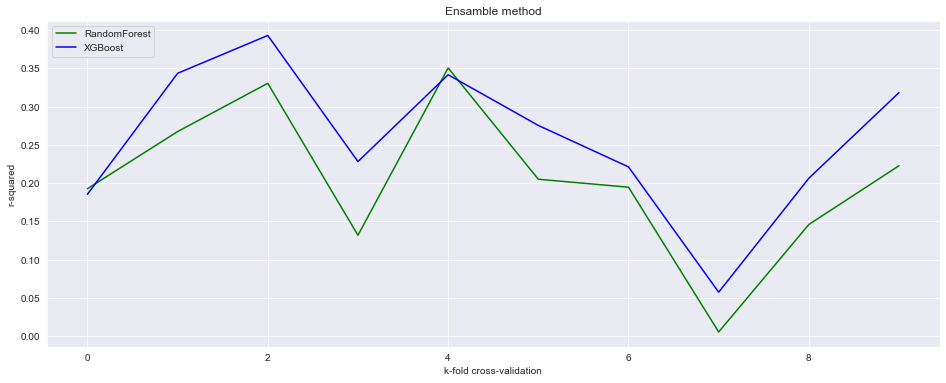

In [183]:
pd.DataFrame(results)
# plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results.loc['randomforest'], c='green')
plt.plot(cv_results.loc['XGBoost'], c='blue')
#plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
#plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('k-fold cross-validation')
plt.ylabel('r-squared')
plt.title("Ensamble method")
plt.legend(['RandomForest','XGBoost'], loc='upper left')


 Model:     randomforest
 Score train data:   0.6363800979340644
 Score test data:   0.2850385486727146

 Residual Analysis:    randomforest


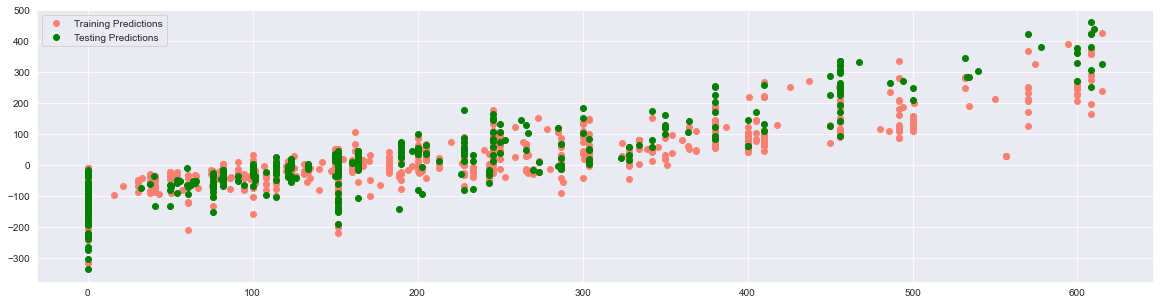


  For Test Data:  
 
MAE:  85.63499160404096
MSE:  15737.956187461665
RMSE:  125.45101110577653

 Model:     XGBoost
 Score train data:   0.6698252628001757
 Score test data:   0.30536529143857793

 Residual Analysis:    XGBoost


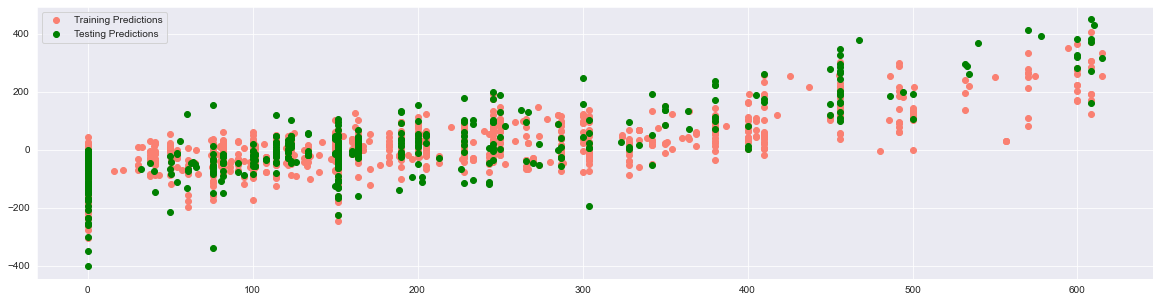


  For Test Data:  
 
MAE:  85.33535167527938
MSE:  15290.517536763671
RMSE:  123.65483224186458


In [184]:
for name, model in models:
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    ytrain_pred = model.predict(X_train)
    print('\n Model:    ', name)
    print(' Score train data:  ', model.score(X_train, y_train))
    print(' Score test data:  ', model.score(X_test, y_test))
   
    print("\n Residual Analysis:   ", name)
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-ytrain_pred),color = "salmon",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
    plt.legend()
    plt.show()

    print("\n  For Test Data:  \n ")
    print("MAE: ",mean_absolute_error(y_test, y_pred))
    print("MSE: ",mean_squared_error(y_test, y_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    # end


# Tune ensemble method: GridSearchCV (XGBoost)<a name="gs"></a>

GridSearchCV

Based on the Gridsearchcv technique from Sci kit-Learn package it is possible to tunning the Hyper parameter fro the model selected.

This facility allows us to find the best hyper parameter combination to obtain the best results.  


In [185]:
model = XGBRegressor()
#model = RandomForestRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=61)


n_estimators = [50, 100, 150, 200, 300]
max_depth = [4, 6, 8, 10, 20]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

In [186]:
#Model Selection based on validation error

grid_search = GridSearchCV(model, 
                           param_grid, #scoring="neg_mean_squared_error",
                           scoring="r2",
                           n_jobs=-1, 
                           cv=kfold,
                           verbose=1)


grid_result = grid_search.fit(X_train, y_train)


# summarize results
print("Best: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))

grid_result


# ML Python_Data_Science_Handbook.pdf
# Pag 79
# pag 366 365

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
# https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

# It's simple: minimizing MSE is equivalent to maximizing negative-MSE.

# An objective function that the scorer can maximize is just by "convention" 
# as the Sklearn documentation suggests


Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best: -0.237870 using {'max_depth': 4, 'n_estimators': 50}


GridSearchCV(cv=KFold(n_splits=10, random_state=61, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weigh...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 20],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='r2', verbose=1)

In [187]:
grid_result.cv_results_
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) using these parameters: %r" % ((-mean), stdev, param))

# chose the small value 

-0.237870 (0.082000) using these parameters: {'max_depth': 4, 'n_estimators': 50}
-0.195267 (0.089027) using these parameters: {'max_depth': 4, 'n_estimators': 100}
-0.175782 (0.097215) using these parameters: {'max_depth': 4, 'n_estimators': 150}
-0.149802 (0.098547) using these parameters: {'max_depth': 4, 'n_estimators': 200}
-0.124938 (0.111339) using these parameters: {'max_depth': 4, 'n_estimators': 300}
-0.162522 (0.102063) using these parameters: {'max_depth': 6, 'n_estimators': 50}
-0.094606 (0.117647) using these parameters: {'max_depth': 6, 'n_estimators': 100}
-0.057131 (0.131248) using these parameters: {'max_depth': 6, 'n_estimators': 150}
-0.030110 (0.140722) using these parameters: {'max_depth': 6, 'n_estimators': 200}
-0.002635 (0.145014) using these parameters: {'max_depth': 6, 'n_estimators': 300}
-0.075466 (0.128263) using these parameters: {'max_depth': 8, 'n_estimators': 50}
-0.041348 (0.139916) using these parameters: {'max_depth': 8, 'n_estimators': 100}
-0.0327

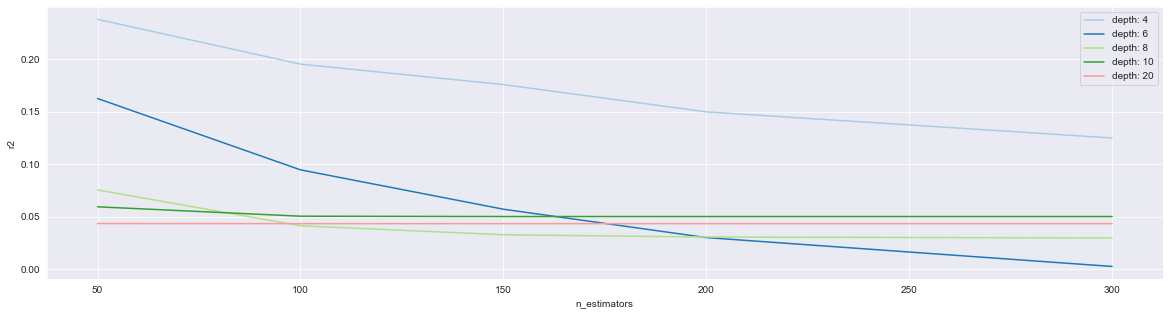

In [188]:
# plot results
plt.figure(figsize = (20,5))
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label= 'depth: ' + str(value))
plt.legend()
plt.xlabel( 'n_estimators' )
plt.ylabel( 'r2' )

plt.show()


# Final model: eXtend Gradient Boosting (XGBoost)<a name="xgb"></a>


In [189]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1672, 6) (419, 6)
(1672,) (419,)


In [190]:
# apply XGBoost regressor with optimous hyper parameters
xgb_model = XGBRegressor(n_estimators=50, 
                         max_depth=4,
                         reg_alpha=0.9).fit(X_train, y_train)

In [191]:
y_pred=xgb_model.predict(X_test)  # prediction for test data
y_train_pred=xgb_model.predict(X_train) # prediction for train data

In [192]:
# metrics 
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2_Score: ", r2_score(y_test, y_pred))
print("Adjusted R2_Score:", 1-((1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1)))

MAE:  85.84722336425416
MSE:  15391.056653303873
R2_Score:  0.3007978881607615
Adjusted R2_Score: 0.2906153331339765


Residual Analysis:


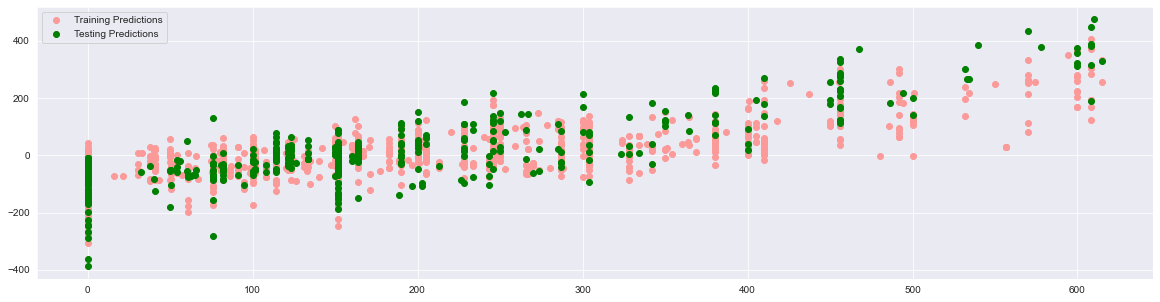

In [193]:
print("Residual Analysis:")
plt.figure(figsize = (20,5))
plt.scatter(y_train,(y_train-ytrain_pred),color = "C4",label = 'Training Predictions')
plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
plt.legend()
plt.show()

In [194]:
pd.DataFrame(y_pred, columns=['Amound paid prediction'])

,Amound paid prediction
0,111.419319
1,147.652863
2,232.712158
3,148.100586
4,168.464752
...,...
414,121.459602
415,157.856659
416,170.280197
417,96.303871


In [195]:
pd.DataFrame(y_test)  # data test

,Amount Paid
626,152.0
1112,200.4
1534,350.0
13,190.0
1848,100.0
...,...
1639,0.0
1518,200.0
375,152.0
133,0.0


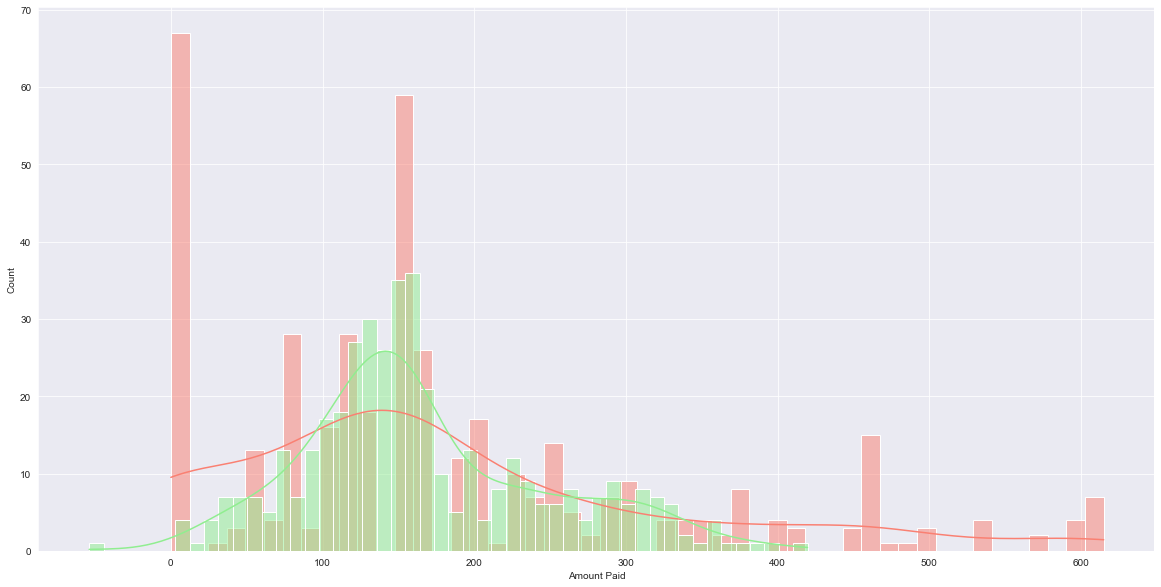

In [196]:
fig = plt.figure(figsize=(20, 10))
sns.set_palette("Paired")
sns.histplot(y_test, kde=True, color='salmon', bins=50)
sns.histplot((y_pred), kde=True, color='lightgreen', bins=50)
plt.show()

In [197]:
##   final step   ##
#pyppeteer -install



 